# Smart Factory Energy Prediction Challenge

## Problem Statement

You've been hired as a data scientist for SmartManufacture Inc., a leading industrial automation company. The company has deployed an extensive sensor network throughout one of their client's manufacturing facilities to monitor environmental conditions and energy usage.

The client is concerned about the increasing energy costs associated with their manufacturing equipment. They want to implement a predictive system that can forecast equipment energy consumption based on various environmental factors and sensor readings from different zones of the factory.

## Task

Your assignment is to develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.

## Goals

1. Analyze the provided sensor data to identify patterns and relationships between environmental factors and equipment energy consumption ✅
2. Build a robust regression model to predict equipment energy consumption
3. Evaluate the model's performance using appropriate metrics
4. Provide actionable insights and recommendations for reducing energy consumption

## Notes on Feature Selection and Random Variables

The dataset includes two variables named random_variable1 and random_variable2. Part of your task is to determine, through proper data analysis and feature selection techniques, whether these variables should be included in your model or not. This mimics real-world scenarios where not all available data is necessarily useful for prediction.

Your approach to handling these variables should be clearly documented and justified in your analysis. This will be an important part of evaluating your feature selection methodology.

Note that your final solution will also be evaluated on a separate holdout dataset that we maintain privately, which serves as an additional check on your model's generalization capability.

## Deliverables

Your submission should include:

1. **A well-documented Jupyter notebook** containing:
   - Exploratory data analysis (EDA)
   - Data preprocessing steps
   - Feature engineering and selection
   - Model development and training
   - Model evaluation and testing
   - Key findings and insights

2. **Python script(s)/notebook(s)** with your final model implementation

3. **A brief report (PDF or Markdown format)** summarizing:
   - Your approach to the problem
   - Key insights from the data
   - Model performance evaluation
   - Recommendations for reducing equipment energy consumption

## Evaluation Criteria

Your solution will be evaluated based on:

1. **Code Quality and Structure (25%)**
   - Clean, well-organized, and properly documented code
   - Appropriate use of functions and classes
   - Effective use of Git with meaningful commit messages
   - Code readability and adherence to Python conventions

2. **Data Analysis and Preprocessing (25%)**
   - Thoroughness of exploratory data analysis
   - Handling of missing values, outliers, and data transformations
   - Feature engineering creativity and effectiveness
   - Proper data splitting methodology

3. **Model Development (25%)**
   - Selection and justification of algorithms
   - Hyperparameter tuning approach
   - Implementation of cross-validation
   - Model interpretability considerations

4. **Results and Insights (25%)**
   - Model performance metrics (RMSE, MAE, R²) on both the test dataset and our private holdout dataset
   - Quality of visualizations and explanations
   - Practical insights and recommendations
   - Critical evaluation of model limitations

## Dataset
>Smart Factory Sensor Data and it's description is in the docs folder.

## Model training
>Pick a model as needed

## Evaluation
>RMSE, MAE and R2 metrics for evaluation

## Experimentation
>Perform experimentation to improve performance

## Dealing with additional variables
>1. I'll see the correlation between predictors and the target variable
>2. I'll build a RandomForestRegressor model and get feature importances from it
>Using these two ways, I'll decide which random variable/s to inlcude or exclude

## Import libraries

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Analysis and Preprocessing
### Load the data

In [378]:
data=pd.read_csv('data/data.csv')

In [379]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [380]:
data.shape

(16857, 29)

The data has 16857 rows and 29 columns.

In [381]:
data.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


So there are 23 numeric columns and most columns have missing values which should be imputed.

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

So there are 6 text columns and 23 numeric columns in this dataset.

In [383]:
data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

Missing values

In [384]:
data.isna().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

### Parsing dates

The dataset has a datetime format column i.e. the timestamp column. So I'll use the `parse_dates` parameter while loading the data.

In [385]:
data=pd.read_csv('data/data.csv',parse_dates=['timestamp'],low_memory=False)

Now look at the data. The timestamp will have datetime as type

In [386]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [387]:
data.describe()

,timestamp,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [389]:
data.timestamp

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
16852   2016-10-03 20:10:00
16853   2016-10-04 06:10:00
16854   2016-11-03 00:50:00
16855   2016-11-04 13:20:00
16856   2016-12-01 15:50:00
Name: timestamp, Length: 16857, dtype: datetime64[ns]

timestamp column is already in sorted order

In [390]:
data.timestamp.is_monotonic_increasing

True

### Split into train,valid and test sets

And keep test set away from the model.

In [391]:
train_and_valid_size=int(len(data)*0.8)
train_and_valid_data=data.iloc[:train_and_valid_size]
test_data=data.iloc[train_and_valid_size:]

In [392]:
len(train_and_valid_data)/len(data),len(test_data)/len(data)

(0.799964406478021, 0.200035593521979)

In [393]:
# split train_and_valid_data in 80-20 train valid splits
train_size=int(len(train_and_valid_data)*0.8)
train_data=train_and_valid_data.iloc[:train_size]
valid_data=train_and_valid_data.iloc[train_size:]

In [394]:
len(train_data)/len(train_and_valid_data),len(valid_data)/len(train_and_valid_data)

(0.8, 0.2)

In [395]:
test_data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
13485,2016-04-13 23:50:00,50.0,0.0,21.79,42.09,19.0,45.59,23.500000,39.126667,21.79,...,20.390000,45.260000,4.583333,753.55,96.833333,1.000000,14.5,4.150000,26.142317,26.142317
13486,2016-04-14 00:00:00,50.0,0.0,21.7,42.09,18.963333333333296,NaN,23.566667,-39.200000,21.79,...,33.238012,45.433333,4.500000,753.60,-60.190618,1.000000,NaN,4.100000,19.388748,19.388748
13487,2016-04-14 00:10:00,60.0,0.0,NaN,42.03,18.89,45.76,23.533333,NaN,21.79,...,20.390000,45.560000,4.366667,753.60,96.666667,0.833333,5.5,3.916667,23.762849,23.762849
13488,2016-04-14 00:10:00,60.0,0.0,NaN,42.03,18.89,45.76,23.533333,NaN,21.79,...,20.390000,45.560000,4.366667,753.60,96.666667,0.833333,5.5,3.916667,23.762849,23.762849
13489,2016-04-14 00:20:00,60.0,0.0,NaN,42.0,18.79,45.73,23.600000,39.290000,21.76,...,20.390000,45.730000,4.233333,753.60,96.333333,0.666667,5.0,-32.098095,37.820135,37.820135


In [396]:
# save the test data
test_data.to_csv('data/test_data.csv',index=False)

# **I did a blunder here I saved the test_data as valid_data and I think when I load the valid dataset(which by mistake was saved test_data saved as valid_data) and perform predictions with it and then compare with the valid labels what actually was happening is predictions are done on the test_data accidentaly saved as valid_data and are compared with valid labels. I think that's why I'm getting such a bad score on valid data**


**So I'll confirm now**

In [397]:
# save the valid data and load after preprocessing train_data
valid_data.to_csv('data/valid_data.csv',index=False)

The test data will undergo the same preprocessing steps as the train data went through.

From now on, `train_data` DataFrame will undergo preprocessing and not the complete `data` DataFrame.

### Handling datatypes of columns

Few columns have their dtype as object though they contain numeric values. So I'll check the values of those columns and then change their dtype to float.

First I'll list all the columns which have dtype as object.

In [398]:
for label,content in train_data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

equipment_energy_consumption
lighting_energy
zone1_temperature
zone1_humidity
zone2_temperature


In [399]:
# pd.options.display.max_rows = 4000


In [400]:
train_data.equipment_energy_consumption

0        60.0
1        60.0
2        50.0
3        50.0
4        60.0
         ... 
10783    50.0
10784    60.0
10785    70.0
10786    80.0
10787    90.0
Name: equipment_energy_consumption, Length: 10788, dtype: object

So this is a numeric columns. Therefore convert to float

In [401]:
train_data.lighting_energy

0        -77.78778596503064
1                      30.0
2                      30.0
3                      40.0
4                      40.0
                ...        
10783                   0.0
10784                   0.0
10785                   0.0
10786                   0.0
10787                   0.0
Name: lighting_energy, Length: 10788, dtype: object

In [402]:
train_data.zone1_temperature

0        33.74660933896648
1                    19.89
2                    19.89
3        33.74660933896648
4                    19.89
               ...        
10783                 21.5
10784                 21.5
10785     21.4266666666667
10786     21.4266666666667
10787                21.39
Name: zone1_temperature, Length: 10788, dtype: object

In [403]:
train_data.zone1_humidity

0         47.59666666666671
1         46.69333333333329
2                      46.3
3          46.0666666666667
4         46.33333333333329
                ...        
10783                  37.5
10784                  37.5
10785    37.433333333333294
10786                 37.56
10787      37.6266666666667
Name: zone1_humidity, Length: 10788, dtype: object

So the columns which were as object dtype contain numeric values. So I'll change the dtype to float

This didn't work so tried the other solution

In [404]:
train_data.equipment_energy_consumption.value_counts()


equipment_energy_consumption
50.0                   2180
40.0                   1433
60.0                   1205
70.0                    653
30.0                    529
                       ... 
-450.0                    1
890.0                     1
670.0                     1
-1139.9856929495108       1
880.0                     1
Name: count, Length: 120, dtype: int64

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [405]:
train_data.lighting_energy.value_counts()

lighting_energy
0.0                   6965
10.0                  1381
20.0                  1045
30.0                   428
-77.78778596503064     114
86.00296632575207      110
40.0                    70
-0.0                    67
-10.0                   19
???                     18
-20.0                   13
error                    9
check                    8
50.0                     6
-30.0                    6
unknown                  4
-86.00296632575207       3
-40.0                    2
60.0                     1
70.0                     1
Name: count, dtype: int64

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [406]:
train_data.zone1_temperature.value_counts()

zone1_temperature
21.0      334
21.1      293
21.29     293
21.39     290
21.2      273
         ... 
18.445      1
19.315      1
19.365      1
19.84       1
23.525      1
Name: count, Length: 386, dtype: int64

The abnormal values in this column were 
- unknown
- ???
- error
- check

In [407]:
train_data.zone1_humidity.value_counts()

zone1_humidity
3.348059697903068    110
76.29275599510133     98
36.9                  93
37.2                  87
38.79                 81
                    ... 
-42.6233333333333      1
42.475                 1
43.96                  1
43.45                  1
38.3725                1
Name: count, Length: 1806, dtype: int64

Here I saw only error and check as abnormal values

In [408]:
train_data.zone2_temperature.value_counts()

zone2_temperature
19.2                  218
19.5                  205
19.29                 201
19.7                  198
19.6                  197
                     ... 
22.8566666666667        1
21.34                   1
22.125                  1
21.226666666666695      1
18.445                  1
Name: count, Length: 574, dtype: int64

The abnormal values in the above columns were 
- unknown
- ???
- error
- check

Few columns had all the above four and few didn't have all.

So to impute these columns I do it as follows

The following 3 code blocks are commented because I've used a for loop to do the same for other columns.

In [409]:
# first replace values which are labelled as unknown, error etc to nan
# train_data.equipment_energy_consumption.replace(['unknown','error','check','???'],np.nan,inplace=True)

In [410]:
# convert to numeric
# train_data.equipment_energy_consumption=pd.to_numeric(data.equipment_energy_consumption,errors='coerce')

`pd.to_numeric()` handles errors by converting valid numbers and anything invalid to NaN 

In [411]:
# fill the NaN values
# train_data.equipment_energy_consumption.mean(),train_data.equipment_energy_consumption.median(),train_data.equipment_energy_consumption.mode()

I chose median to fill the NaN values because it is not sensitive to outliers.

Using a for loop to do the cleaning and imputing error due to value not changed in originsl data

Use a line below or use .loc

In [412]:
 pd.options.mode.copy_on_write = True 

In [413]:
for col in ['equipment_energy_consumption','lighting_energy','zone1_temperature','zone1_humidity','zone2_temperature']:
    train_data[col] = train_data[col].replace(['unknown','error','check','???'], np.nan)
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    train_data[col] = train_data[col].fillna(train_data[col].median())

In [414]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     10788 non-null  datetime64[ns]
 1   equipment_energy_consumption  10788 non-null  float64       
 2   lighting_energy               10788 non-null  float64       
 3   zone1_temperature             10788 non-null  float64       
 4   zone1_humidity                10788 non-null  float64       
 5   zone2_temperature             10788 non-null  float64       
 6   zone2_humidity                10251 non-null  float64       
 7   zone3_temperature             10276 non-null  float64       
 8   zone3_humidity                10249 non-null  float64       
 9   zone4_temperature             10245 non-null  float64       
 10  zone4_humidity                10282 non-null  float64       
 11  zone5_temperature           

In [415]:
train_data.isna().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                  537
zone3_temperature               512
zone3_humidity                  539
zone4_temperature               543
zone4_humidity                  506
zone5_temperature               515
zone5_humidity                  503
zone6_temperature               537
zone6_humidity                  535
zone7_temperature               486
zone7_humidity                  500
zone8_temperature               532
zone8_humidity                  482
zone9_temperature               501
zone9_humidity                  557
outdoor_temperature             524
atmospheric_pressure            535
outdoor_humidity                505
wind_speed                      539
visibility_index                541
dew_point                       516
random_variable1            

### Sort the dataframe or data by `timestamp` column

It is very important to sort the data on the timestamp column because it helps us easily divide the data into train and test sets like for example train data from jan - may and test data from june-aug like predicting the future from the past trained data.

This step is very important when working with time-series dataset.

But the timestamp column is already sorted

In [416]:
train_data.timestamp.is_monotonic_increasing
# which says that the column is already sorted

True

In [417]:
train_data.head(10)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.20,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.20,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.20,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.000000,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.000000,19.890000,45.766667,19.20,44.500000,19.79,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.000000,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60.0,40.000000,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.000000,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


### Make a copy of the original data

So that you can revert at anytime if needed.

In [418]:
# data_cop=train_data.copy()

### Add datetime columns such as saleYear,saleMonth 

And place at the end of columns



In [419]:
train_data['saleYear']=train_data['timestamp'].dt.year
train_data['saleMonth']=train_data['timestamp'].dt.month
train_data['saleDay']=train_data['timestamp'].dt.day
train_data['saleDayOfTheWeek']=train_data['timestamp'].dt.dayofweek
train_data['saleDayOfTheYear']=train_data['timestamp'].dt.dayofyear

In [420]:
train_data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,0,11
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,0,11
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,0,11
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016,1,11,0,11
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,0,11


In [421]:
train_data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayOfTheWeek', 'saleDayOfTheYear'],
      dtype='object')

Now you can remove the `timestamp` column

In [422]:
train_data.drop('timestamp',axis=1,inplace=True)

### Exploratory Data Analysis

Here I'll explore the data a bit and try to find some patterns in data before noving to model training.

I'll first get the correlation matrix.

In [423]:
train_data.equipment_energy_consumption.dtype

dtype('float64')

In [424]:
corr_mat=train_data.corr(method='pearson',numeric_only=True)

In [425]:
corr_mat

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
equipment_energy_consumption,1.000000,0.067672,0.013813,0.014194,0.033055,-0.001338,0.029790,-0.002773,0.022921,-0.013509,...,0.001207,-0.002306,-0.006894,-0.012605,-0.007166,NaN,0.004162,-0.022620,-0.008241,-0.003735
lighting_energy,0.067672,1.000000,0.078767,0.055434,0.071199,0.011754,0.043068,0.024968,0.077465,0.030174,...,0.003802,-0.005560,0.032043,0.002012,-0.016279,NaN,-0.006499,-0.055382,-0.032523,-0.026592
zone1_temperature,0.013813,0.078767,1.000000,0.001429,0.205756,-0.021022,0.206781,0.013402,0.187571,0.012492,...,0.018418,-0.018383,0.048547,0.002539,0.001397,NaN,0.176862,-0.125460,-0.000921,0.147354
zone1_humidity,0.014194,0.055434,0.001429,1.000000,0.062362,0.083620,0.023988,0.092707,-0.024219,0.149176,...,0.091824,-0.008999,0.132265,-0.020181,-0.011219,NaN,-0.181709,-0.006164,-0.033804,-0.197776
zone2_temperature,0.033055,0.071199,0.205756,0.062362,1.000000,0.002879,0.143655,0.067852,0.116056,0.080665,...,0.084809,-0.028729,0.106097,0.012987,-0.006405,NaN,-0.033520,-0.107030,0.004305,-0.073485
zone2_humidity,-0.001338,0.011754,-0.021022,0.083620,0.002879,1.000000,0.017734,0.059580,-0.024172,0.107048,...,0.044932,-0.008654,0.117849,-0.008635,-0.004196,NaN,-0.100997,-0.004229,-0.025991,-0.110740
zone3_temperature,0.029790,0.043068,0.206781,0.023988,0.143655,0.017734,1.000000,-0.018361,0.163036,0.021349,...,0.049184,-0.015779,0.081396,-0.008358,-0.006927,NaN,0.189002,-0.093788,-0.046314,0.173391
zone3_humidity,-0.002773,0.024968,0.013402,0.092707,0.067852,0.059580,-0.018361,1.000000,-0.035153,0.107720,...,0.064155,-0.007302,0.105265,0.001712,0.014897,NaN,-0.208852,-0.009834,-0.028354,-0.229204
zone4_temperature,0.022921,0.077465,0.187571,-0.024219,0.116056,-0.024172,0.163036,-0.035153,1.000000,-0.038872,...,-0.013952,-0.030520,0.018689,0.010483,0.009131,NaN,0.218271,-0.090690,-0.079059,0.204569
zone4_humidity,-0.013509,0.030174,0.012492,0.149176,0.080665,0.107048,0.021349,0.107720,-0.038872,1.000000,...,0.110738,0.001978,0.155771,0.003369,0.006214,NaN,-0.244317,-0.010180,0.000596,-0.267469


In [426]:
train_data.saleYear.value_counts()

saleYear
2016    10788
Name: count, dtype: int64

In [427]:
corr_mat['equipment_energy_consumption'].sort_values(ascending=False)

equipment_energy_consumption    1.000000
lighting_energy                 0.067672
zone8_temperature               0.033760
zone2_temperature               0.033055
zone3_temperature               0.029790
zone4_temperature               0.022921
zone1_humidity                  0.014194
zone1_temperature               0.013813
outdoor_temperature             0.011941
zone6_temperature               0.010587
zone7_temperature               0.004753
zone5_temperature               0.004650
saleMonth                       0.004162
zone9_temperature               0.003839
wind_speed                      0.001207
zone2_humidity                 -0.001338
zone5_humidity                 -0.001360
visibility_index               -0.002306
zone3_humidity                 -0.002773
saleDayOfTheYear               -0.003735
dew_point                      -0.006894
random_variable2               -0.007166
atmospheric_pressure           -0.007400
saleDayOfTheWeek               -0.008241
random_variable1

From the correlation matrix, it is clear that few top columns have positive correlation with the target i.e `equipment_energy_comsumption`

And from this I assume that both the random variables i.e. `random_variable1` and `random_variable2` are not useful in prediction of the target `equipment_energy_comsumption` because both have negative correlation with the target.

I'll confirm further after I build a `RandomForestRegressor`

Now I'll use `scatter_matrix` from pandas to look at a few columns correlation with the target.

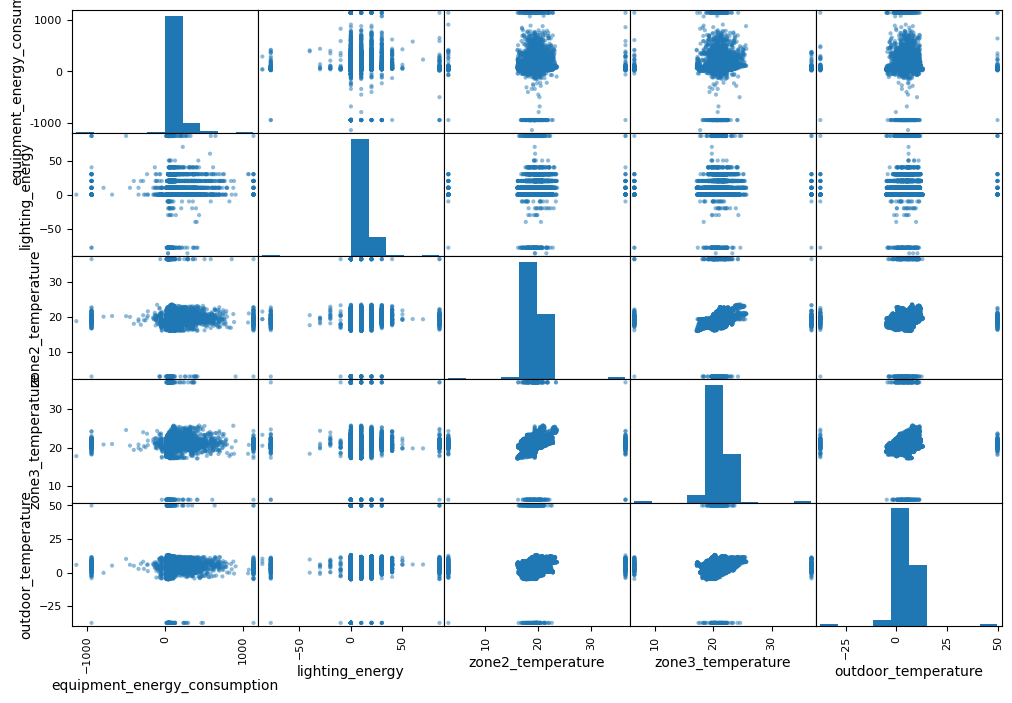

In [428]:
from pandas.plotting import scatter_matrix

cols=['equipment_energy_consumption', 'lighting_energy','zone2_temperature','zone3_temperature','outdoor_temperature']
scatter_matrix(data_cop[cols],figsize=(12,8))
plt.show()

So from the correlation matrix, it looks like `lighting_energy` and `zone2_temperature` are good predictors

So visualising them.

<Axes: xlabel='equipment_energy_consumption', ylabel='lighting_energy'>

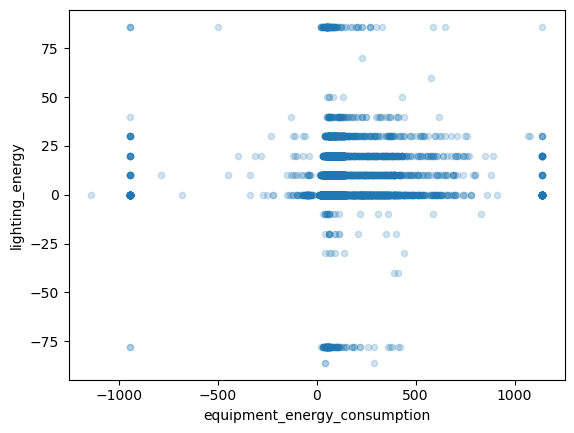

In [429]:
train_data.plot(kind='scatter',
            alpha=0.2,
             x='equipment_energy_consumption',
             y='lighting_energy')

<Axes: xlabel='equipment_energy_consumption', ylabel='zone2_temperature'>

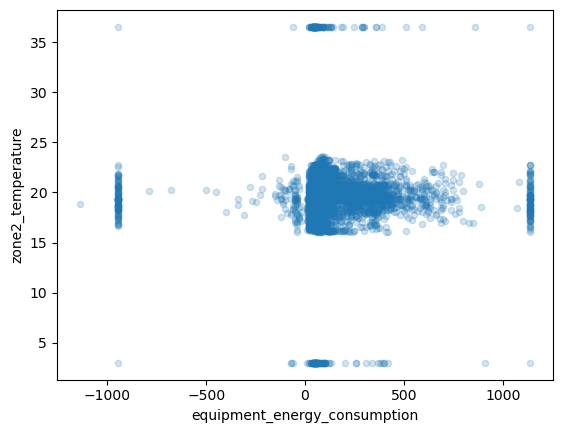

In [430]:
train_data.plot(kind='scatter',
            alpha=0.2,
             x='equipment_energy_consumption',
             y='zone2_temperature')

<Axes: >

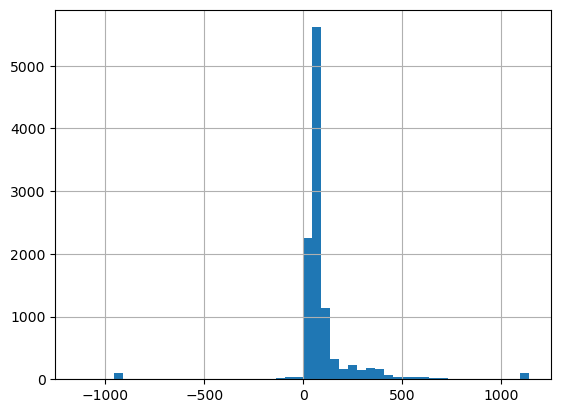

In [431]:
train_data['equipment_energy_consumption'].hist(bins=50)

Heatmap of correlation matrix

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

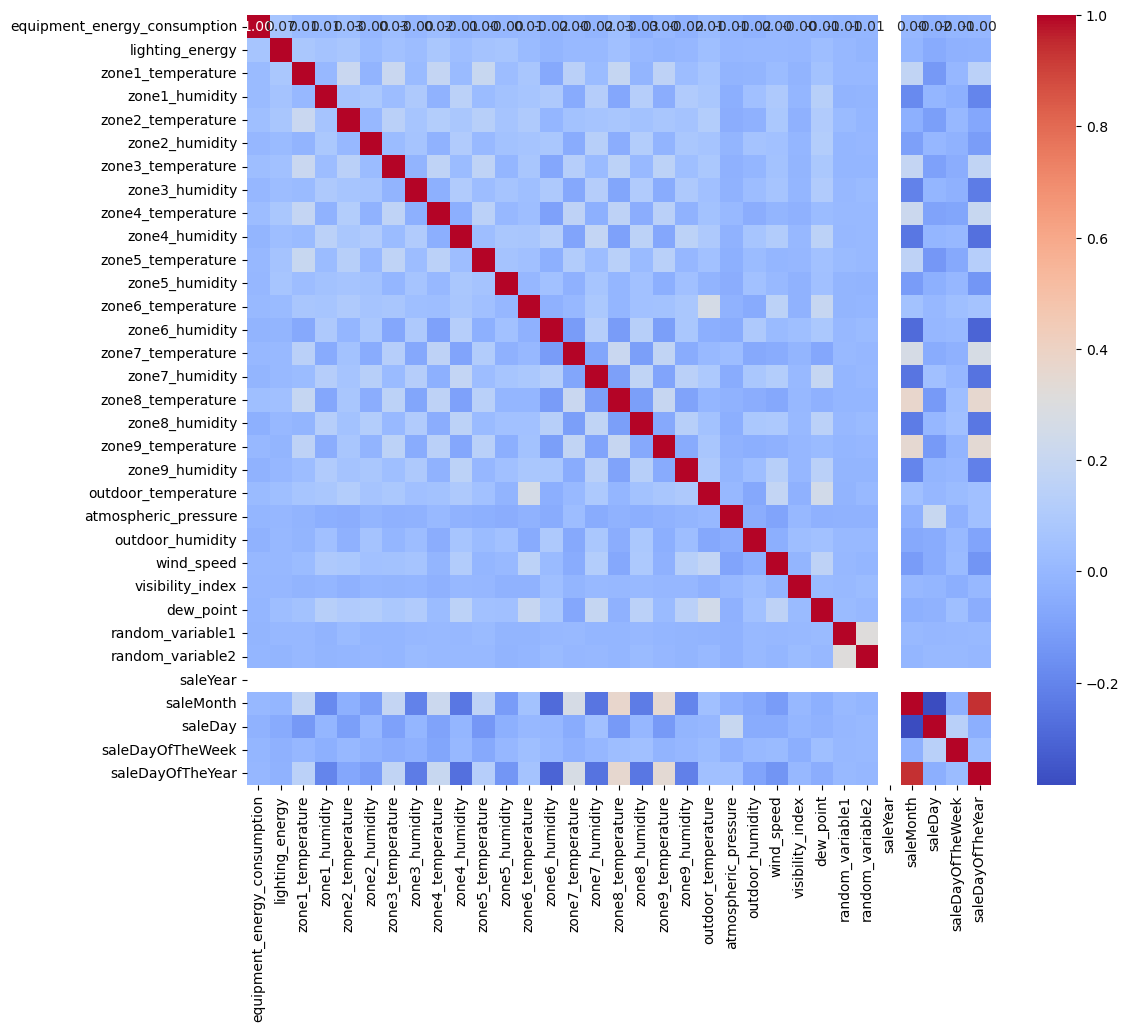

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')


### Imputing missing values

One reason for bad model performance was that I used imputer fit_transform on both train and valid sets. So I'll first split the data then fit_transform on train data then transform on valid data.

I'll use `SimpleImputer` from scikit-learn

In [433]:
train_data.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016,1,11,0,11
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016,1,11,0,11
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016,1,11,0,11
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016,1,11,0,11
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016,1,11,0,11


In [434]:
train_data.isna().sum()

equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                  537
zone3_temperature               512
zone3_humidity                  539
zone4_temperature               543
zone4_humidity                  506
zone5_temperature               515
zone5_humidity                  503
zone6_temperature               537
zone6_humidity                  535
zone7_temperature               486
zone7_humidity                  500
zone8_temperature               532
zone8_humidity                  482
zone9_temperature               501
zone9_humidity                  557
outdoor_temperature             524
atmospheric_pressure            535
outdoor_humidity                505
wind_speed                      539
visibility_index                541
dew_point                       516
random_variable1                524
random_variable2            

In [435]:
from sklearn.impute import SimpleImputer

In [436]:
imputer=SimpleImputer(strategy='median')

In [437]:
train=imputer.fit_transform(train_data)

**Inlcude in preprocessing function**

In [438]:
# valid=imputer.transform(valid_data)
# creating dataframe from the ouput of imputer
# valid_imputed=pd.DataFrame(valid,columns=data_valid.columns,index=data_valid.index)
# I'll do it later(done)

In [439]:
# creating dataframe from the ouput of imputer
train_imputed=pd.DataFrame(train,columns=train_data.columns,index=train_data.index)

In [440]:
train_imputed

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,50.0,0.000000,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,...,4.500000,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0
10784,60.0,0.000000,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,...,4.666667,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0
10785,70.0,0.000000,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,...,4.833333,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0
10786,80.0,0.000000,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,...,5.000000,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0


In [441]:
train_imputed.isna().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
saleYear                        0
saleMonth     

### The values in `equipment_energy_consumption` should range between 10-1080 Wh aka Handling outliers in that column

So handle this 

In [442]:
train_imputed.equipment_energy_consumption.min()

-1139.9856929495108

In [443]:
train_imputed.equipment_energy_consumption.max()

1139.9856929495108

So I'll cap the negative values or values less than 10 to 10.

In [444]:
train_imputed

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,50.0,0.000000,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,...,4.500000,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0
10784,60.0,0.000000,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,...,4.666667,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0
10785,70.0,0.000000,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,...,4.833333,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0
10786,80.0,0.000000,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,...,5.000000,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0


In [445]:
tmp=train_imputed.copy()

In [446]:
# changing values <10 to 10
tmp.loc[tmp['equipment_energy_consumption']<0,'equipment_energy_consumption']=10

In [447]:
tmp['equipment_energy_consumption'].min()

10.0

In [448]:
# changing values >1080 to 1080
tmp.loc[tmp['equipment_energy_consumption']>1080,'equipment_energy_consumption']=1080

In [449]:
tmp['equipment_energy_consumption'].max()

1080.0

In [450]:
tmp.head(30)

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.200000,44.790000,19.790000,39.326667,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.200000,44.590000,19.790000,45.000000,19.700000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
5,50.0,40.000000,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,5.333333,43.833333,4.800000,44.919484,24.785914,2016.0,1.0,11.0,0.0,11.0
6,60.0,50.000000,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,35.921144,45.790000,...,5.000000,40.000000,4.700000,47.233763,47.233763,2016.0,1.0,11.0,0.0,11.0
7,60.0,50.000000,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,5.166667,40.000000,4.683333,33.039890,33.039890,2016.0,1.0,11.0,0.0,11.0
8,60.0,40.000000,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,5.333333,40.000000,-32.098095,31.455702,31.455702,2016.0,1.0,11.0,0.0,11.0
9,70.0,40.000000,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,...,5.500000,40.000000,4.650000,3.089314,3.089314,2016.0,1.0,11.0,0.0,11.0


In [451]:
tmp.lighting_energy.value_counts()

lighting_energy
 0.000000     7589
 10.000000    1381
 20.000000    1045
 30.000000     428
-77.787786     114
 86.002966     110
 40.000000      70
-10.000000      19
-20.000000      13
 50.000000       6
-30.000000       6
-86.002966       3
-40.000000       2
 70.000000       1
 60.000000       1
Name: count, dtype: int64

Successful therfore make the changes to `data_train`

In [452]:
pd.options.mode.copy_on_write = True

In [453]:
# changing values <10 to 10
train_imputed.loc[train_imputed['equipment_energy_consumption']<0,'equipment_energy_consumption']=10

In [454]:
# changing values >1080 to 1080
train_imputed.loc[train_imputed['equipment_energy_consumption']>1080,'equipment_energy_consumption']=1080

In [455]:
train_imputed.equipment_energy_consumption.min()

10.0

In [456]:
train_imputed.equipment_energy_consumption.max()

1080.0

Finally the data is cleaned and is also free from missing values.

**Same for valid set inlcude in preprocessing function**

In [457]:
# changing values <10 to 10
# valid_imputed.loc[valid_imputed['equipment_energy_consumption']<0,'equipment_energy_consumption']=10
# changing values >1080 to 1080
# valid_imputed.loc[valid_imputed['equipment_energy_consumption']>1080,'equipment_energy_consumption']=1080

### Handling ouliers

Except the `equipment_energy_consumption` column beacuse it's range is already given and I have changed those column values

In [458]:
target_train=train_imputed['equipment_energy_consumption']

In [459]:
len(target_train)

10788

**Include in preprocessing function**(done)

In [460]:
# target_valid=valid_imputed['equipment_energy_consumption']

In [461]:
target_train

0        60.0
1        60.0
2        50.0
3        50.0
4        60.0
         ... 
10783    50.0
10784    60.0
10785    70.0
10786    80.0
10787    90.0
Name: equipment_energy_consumption, Length: 10788, dtype: float64

In [462]:
train_imputed.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,39.326667,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,19.700000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0


In [463]:
def cap_outliers(data):
    data_capped=data.copy()
    for col in data_capped.select_dtypes(include='number').columns:
        q1=data_capped[col].quantile(0.25)
        q3=data_capped[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        data_capped[col]=data_capped[col].clip(lower=lower_bound,upper=upper_bound)
        return data_capped

In [464]:
df_train=cap_outliers(train_imputed.drop('equipment_energy_consumption',axis=1))

In [465]:
df_train

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,-15.0,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,17.166667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,25.0,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,25.0,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,18.390000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,25.0,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,17.166667,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,25.0,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,0.0,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,19.408333,...,4.500000,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0
10784,0.0,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,19.390000,...,4.666667,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0
10785,0.0,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,19.390000,...,4.833333,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0
10786,0.0,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,19.414444,...,5.000000,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0


In [466]:
df_train.lighting_energy.value_counts()

lighting_energy
 0.0     7589
 10.0    1381
 20.0    1045
 25.0     616
-15.0     138
-10.0      19
Name: count, dtype: int64

In [467]:
train_imputed

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,60.0,-77.787786,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,60.0,30.000000,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,50.0,30.000000,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,50.0,40.000000,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,60.0,40.000000,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,50.0,0.000000,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,...,4.500000,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0
10784,60.0,0.000000,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,...,4.666667,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0
10785,70.0,0.000000,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,...,4.833333,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0
10786,80.0,0.000000,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,...,5.000000,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0


In [468]:
train_imputed=df_train

In [469]:
train_imputed

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,-15.0,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,17.166667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,25.0,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,25.0,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,18.390000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,25.0,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,17.166667,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,25.0,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,0.0,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,19.408333,...,4.500000,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0
10784,0.0,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,19.390000,...,4.666667,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0
10785,0.0,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,19.390000,...,4.833333,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0
10786,0.0,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,19.414444,...,5.000000,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0


In [470]:
train_imputed['equipment_energy_consumption']=target_train

In [471]:
train_imputed

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear,equipment_energy_consumption
0,-15.0,33.746609,47.596667,19.200000,44.790000,19.79,39.326667,19.000000,45.566667,17.166667,...,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0,60.0
1,25.0,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0,60.0
2,25.0,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,18.390000,...,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0,50.0
3,25.0,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,19.700000,45.723333,17.166667,...,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0,50.0
4,25.0,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,0.0,21.500000,37.500000,18.000000,43.060000,20.89,37.730000,20.000000,39.230000,19.408333,...,25.500000,-32.098095,40.107711,40.107711,2016.0,3.0,26.0,5.0,86.0,50.0
10784,0.0,21.500000,37.500000,18.000000,42.933333,23.20,37.790000,19.700000,-39.230000,19.390000,...,25.000000,2.733333,33.363098,33.363098,2016.0,3.0,26.0,5.0,86.0,60.0
10785,0.0,21.426667,37.433333,18.033333,42.900000,23.26,37.790000,20.000000,39.290000,19.390000,...,24.500000,2.916667,3.914162,3.914162,2016.0,3.0,26.0,5.0,86.0,70.0
10786,0.0,21.426667,37.560000,36.552882,42.826667,23.23,37.730000,20.000000,39.290000,19.414444,...,24.000000,3.100000,46.913013,46.913013,2016.0,3.0,26.0,5.0,86.0,80.0


In [472]:
train_imputed.lighting_energy.min()

-15.0

In [473]:
train_imputed.lighting_energy.max()

25.0

Same outlier handling for valid set **will be done later**

In [474]:
# df_valid=cap_outliers(valid_imputed.drop('equipment_energy_consumption',axis=1))

# valid_imputed=df_valid

# valid_imputed['equipment_energy_consumption']=target_valid

# valid_imputed

In [475]:
train_imputed.to_csv('data/train_data_cleaned.csv',index=False)


In [476]:
# valid_imputed.to_csv('data/valid_data_cleaned.csv',index=False)


### Load the preprocessed data

In [477]:
data_train=pd.read_csv('data/train_data_cleaned.csv')

In [478]:
data_train.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear,equipment_energy_consumption
0,-15.0,33.746609,47.596667,19.2,44.790000,19.79,39.326667,19.000000,45.566667,17.166667,...,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0,60.0
1,25.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0,60.0
2,25.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,18.390000,...,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0,50.0
3,25.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,19.700000,45.723333,17.166667,...,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0,50.0
4,25.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0,60.0


In [479]:
data_train.isna().sum()

lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
saleYear                        0
saleMonth                       0
saleDay       

In [480]:
# data_valid=pd.read_csv('data/valid_data_cleaned.csv')

In [481]:
# data_valid.info()

## Function for preprocessing new data or test data

In [482]:
def preprocess_data(file_path,imputer=None,fit_imputer=True):
    """
    Preprocess time-series energy consumption data for machine learning models.

    This function performs the following steps:
    - Parses the 'timestamp' column as datetime and sorts the data chronologically
    - Replaces abnormal string values like 'unknown', 'error', 'check', and '???' with NaN
    - Converts specified columns to numeric dtype (float), coercing non-numeric values
    - Fills initial missing values using the column median
    - Adds additional datetime-derived features: year, month, day, day of week, and day of year
    - Drops the original 'timestamp' column
    - Imputes remaining missing values using a SimpleImputer (with median strategy)
    - Caps outliers in 'equipment_energy_consumption' to be within [10, 1080]
    - Caps outliers in the other features using the `cap_outliers()` function

    Parameters
    ----------
    file_path : str
        Path to the CSV file containing the data.
    imputer : sklearn.impute.SimpleImputer or None, optional
        A fitted SimpleImputer instance to reuse for imputation.
        If None, a new one will be created and fitted if `fit_imputer=True`.
    fit_imputer : bool
        Whether to fit the imputer on the data (should be True for training data).
        Must be False for test/validation data when using a previously fitted imputer.

    Returns
    -------
    data_imputed : pd.DataFrame
        The preprocessed and imputed DataFrame, ready for modeling.
    imputer : SimpleImputer
        The fitted (or reused) SimpleImputer object.

    Raises
    ------
    ValueError
        If `imputer` is None and `fit_imputer` is False.

    Example Usage
    -------------
    # For training data
    train_df, imputer = preprocess_data('train.csv')

    # For validation/test data (reusing the same imputer)
    val_df, _ = preprocess_data('val.csv', imputer=imputer, fit_imputer=False)
    """
    # parse dates
    data=pd.read_csv(file_path,parse_dates=['timestamp'],low_memory=False)
    data.sort_values('timestamp', inplace=True)
    
    # handling dtypes of columns
    for col in ['equipment_energy_consumption','lighting_energy','zone1_temperature','zone1_humidity','zone2_temperature']:
        data[col] = data[col].replace(['unknown','error','check','???'], np.nan)
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

    
    # add datetime columns
    data['saleYear']=data['timestamp'].dt.year
    data['saleMonth']=data['timestamp'].dt.month
    data['saleDay']=data['timestamp'].dt.day
    data['saleDayOfTheWeek']=data['timestamp'].dt.dayofweek
    data['saleDayOfTheYear']=data['timestamp'].dt.dayofyear
    
    # drop timestamp column
    data.drop('timestamp',axis=1,inplace=True)
    
    # impute missing values
    # create or reuse imputer
    if imputer is None:
        imputer=SimpleImputer(strategy='median')
    # Apply imputer
    if fit_imputer:
        X = imputer.fit_transform(data)
    else:
        X = imputer.transform(data)
    # creating dataframe from the ouput of imputer
    data_imputed=pd.DataFrame(X,columns=data.columns,index=data.index)
    
    # handling outliers
    # target column
    # changing values <10 to 10
    data_imputed.loc[data_imputed['equipment_energy_consumption']<0,'equipment_energy_consumption']=10
    # changing values >1080 to 1080
    data_imputed.loc[data_imputed['equipment_energy_consumption']>1080,'equipment_energy_consumption']=1080
    
    # other columns
    target=data_imputed['equipment_energy_consumption']
    df_train=cap_outliers(data_imputed.drop('equipment_energy_consumption',axis=1))
    data_imputed=df_train
    data_imputed['equipment_energy_consumption']=target
    return data_imputed,imputer

### Preprocess the valid data

In [483]:
valid_data=pd.read_csv('data/valid_data.csv')

In [484]:
val_data,_=preprocess_data('data/valid_data.csv',imputer=imputer,fit_imputer=False)

In [485]:
val_data.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear,equipment_energy_consumption
0,0.0,21.39,37.760000,18.365000,40.400000,23.200000,37.400000,20.000,-40.000000,19.39,...,22.666667,3.7,2.173475,2.173475,2016.0,3.0,26.0,5.0,86.0,60.0
1,0.0,21.39,37.933333,18.390000,42.790000,23.133333,37.326667,20.075,40.350000,19.39,...,22.000000,4.0,37.793480,37.793480,2016.0,3.0,26.0,5.0,86.0,60.0
2,0.0,21.39,38.193333,18.500000,43.000000,23.100000,37.200000,20.100,40.400000,19.39,...,21.333333,4.3,28.841168,28.841168,2016.0,3.0,26.0,5.0,86.0,50.0
3,0.0,22.00,38.463333,18.426667,43.000000,23.100000,39.326667,20.100,40.260000,19.39,...,20.666667,4.6,35.457301,35.457301,2016.0,3.0,26.0,5.0,86.0,60.0
4,0.0,21.39,38.663333,18.463333,43.326667,23.066667,37.090000,20.100,40.126667,19.39,...,20.000000,4.9,26.255114,26.255114,2016.0,3.0,26.0,5.0,86.0,50.0


In [352]:
val_data.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear,equipment_energy_consumption
0,0.0,21.39,37.760000,18.365000,40.400000,23.200000,37.400000,20.000,-40.000000,19.39,...,22.666667,3.7,2.173475,2.173475,2016.0,3.0,26.0,5.0,86.0,60.0
1,0.0,21.39,37.933333,18.390000,42.790000,23.133333,37.326667,20.075,40.350000,19.39,...,22.000000,4.0,37.793480,37.793480,2016.0,3.0,26.0,5.0,86.0,60.0
2,0.0,21.39,38.193333,18.500000,43.000000,23.100000,37.200000,20.100,40.400000,19.39,...,21.333333,4.3,28.841168,28.841168,2016.0,3.0,26.0,5.0,86.0,50.0
3,0.0,22.00,38.463333,18.426667,43.000000,23.100000,39.326667,20.100,40.260000,19.39,...,20.666667,4.6,35.457301,35.457301,2016.0,3.0,26.0,5.0,86.0,60.0
4,0.0,21.39,38.663333,18.463333,43.326667,23.066667,37.090000,20.100,40.126667,19.39,...,20.000000,4.9,26.255114,26.255114,2016.0,3.0,26.0,5.0,86.0,50.0


## Training a baseline model

Now I'll train a baseline model which will be a `RandomForestRegressor` as it is the best model for regresion task. It is an ensemble model and performs the best for regression tasks and is also not sensitive to outliers and also it does not require feature scaling.

So for these reasons, I have choosen `RandomForestRegressor` for model training.

### Separate labels and predictors 

For both `data_train` and `data_valid`

In [486]:
X_train,y_train=data_train.drop('equipment_energy_consumption',axis=1),data_train['equipment_energy_consumption']
X_valid,y_valid=val_data.drop('equipment_energy_consumption',axis=1),val_data['equipment_energy_consumption']

### Time to train the first model

In [487]:
from sklearn.ensemble import RandomForestRegressor

model_0=RandomForestRegressor(n_jobs=-1,random_state=42)

In [488]:
X_train.columns

Index(['lighting_energy', 'zone1_temperature', 'zone1_humidity',
       'zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity', 'zone7_temperature', 'zone7_humidity',
       'zone8_temperature', 'zone8_humidity', 'zone9_temperature',
       'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure',
       'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point',
       'random_variable1', 'random_variable2', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfTheWeek', 'saleDayOfTheYear'],
      dtype='object')

In [489]:
X_train.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,saleYear,saleMonth,saleDay,saleDayOfTheWeek,saleDayOfTheYear
0,-15.0,33.746609,47.596667,19.2,44.790000,19.79,39.326667,19.000000,45.566667,17.166667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016.0,1.0,11.0,0.0,11.0
1,25.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016.0,1.0,11.0,0.0,11.0
2,25.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,18.390000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016.0,1.0,11.0,0.0,11.0
3,25.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,19.700000,45.723333,17.166667,...,6.000000,51.500000,37.673716,45.410389,45.410389,2016.0,1.0,11.0,0.0,11.0
4,25.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016.0,1.0,11.0,0.0,11.0


In [490]:
X_train.isna().sum()

lighting_energy         0
zone1_temperature       0
zone1_humidity          0
zone2_temperature       0
zone2_humidity          0
zone3_temperature       0
zone3_humidity          0
zone4_temperature       0
zone4_humidity          0
zone5_temperature       0
zone5_humidity          0
zone6_temperature       0
zone6_humidity          0
zone7_temperature       0
zone7_humidity          0
zone8_temperature       0
zone8_humidity          0
zone9_temperature       0
zone9_humidity          0
outdoor_temperature     0
atmospheric_pressure    0
outdoor_humidity        0
wind_speed              0
visibility_index        0
dew_point               0
random_variable1        0
random_variable2        0
saleYear                0
saleMonth               0
saleDay                 0
saleDayOfTheWeek        0
saleDayOfTheYear        0
dtype: int64

In [491]:
model_0.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

### Function to evaluate the model

In [492]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def show_scores(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    scores={
        'Train MAE':mean_absolute_error(y_train,train_preds),
        'Valid MAE':mean_absolute_error(y_valid,valid_preds),
        'Train RMSE':np.sqrt(mean_squared_error(y_train,train_preds)),
        'Valid RMSE':np.sqrt(mean_squared_error(y_valid,valid_preds)),
        'Train R2':r2_score(y_train,train_preds),
        'Valid R2':r2_score(y_valid,valid_preds)
    }
    return scores

In [493]:
show_scores(model_0)

{'Train MAE': 23.547005932517614,
 'Valid MAE': 164.70530218761584,
 'Train RMSE': 49.39174828704259,
 'Valid RMSE': 193.34536206554856,
 'Train R2': 0.8796406978572957,
 'Valid R2': -0.7360782218870463}

<Axes: >

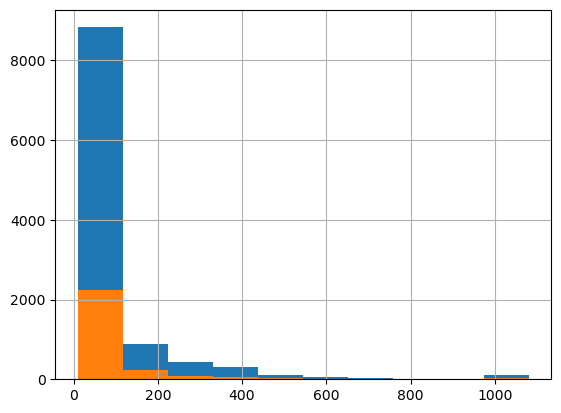

In [494]:
data_train['equipment_energy_consumption'].hist()
val_data['equipment_energy_consumption'].hist()


C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18900\3650384580.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(val_data[col], label='Validation', fill=True)


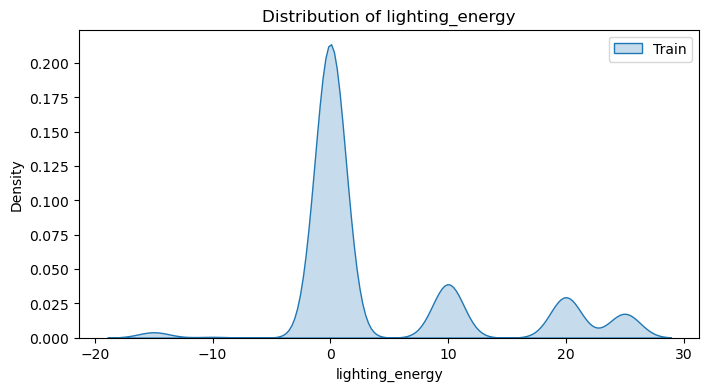

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


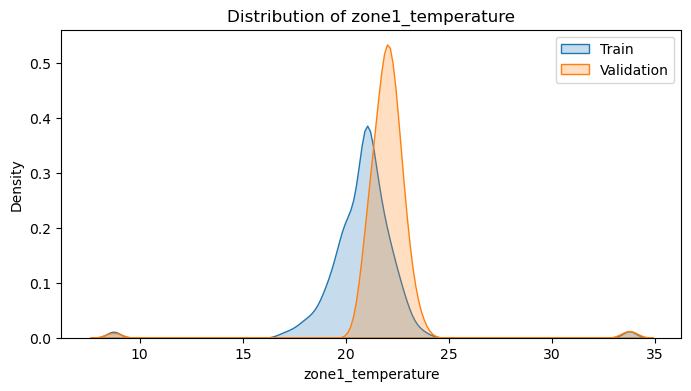

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


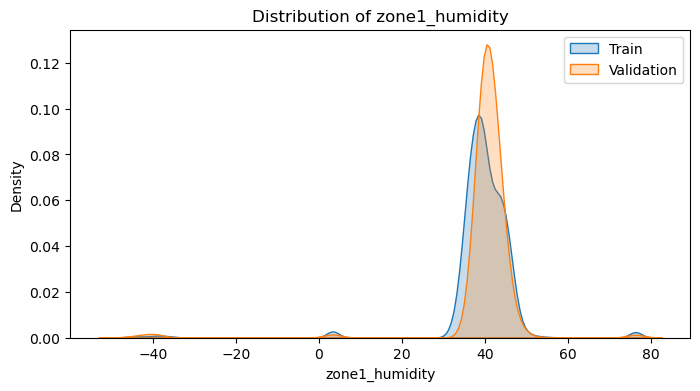

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


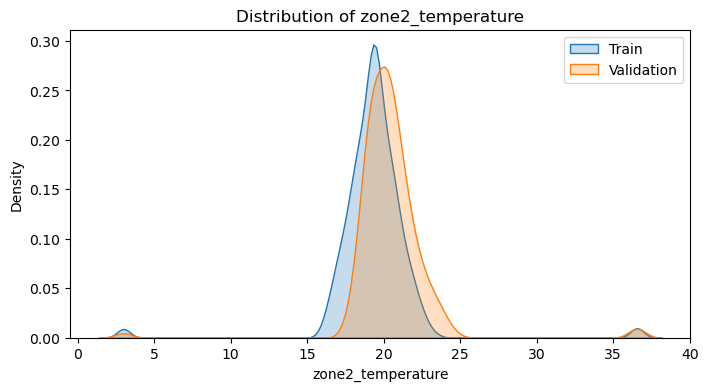

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


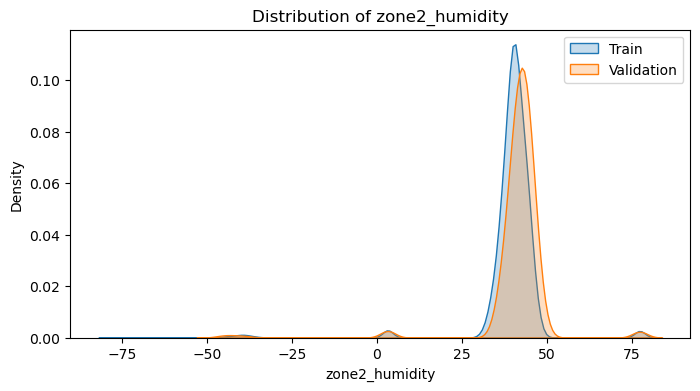

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


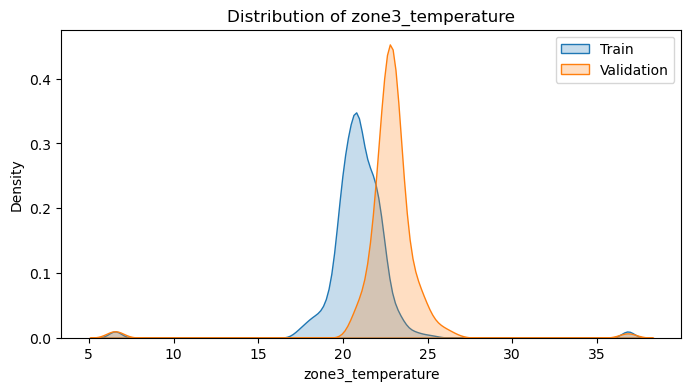

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


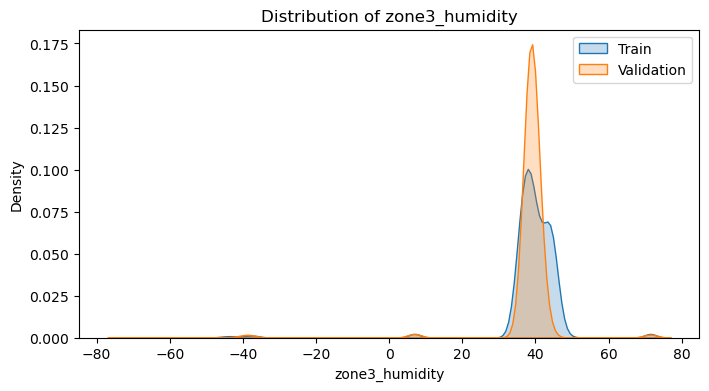

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


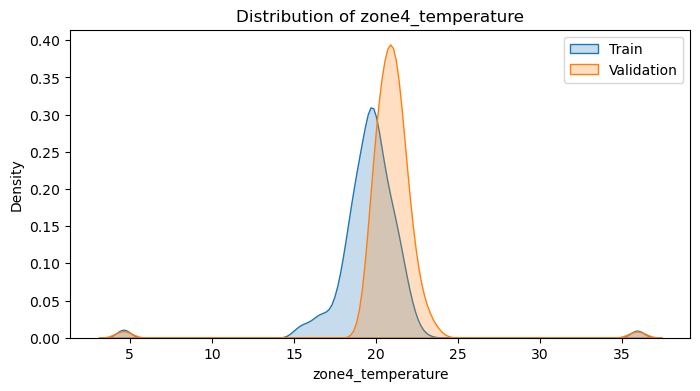

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


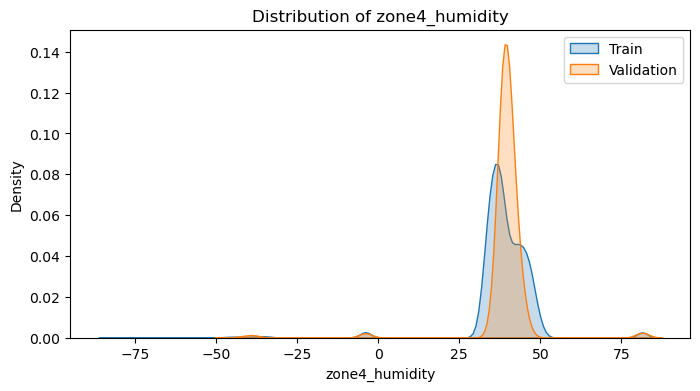

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


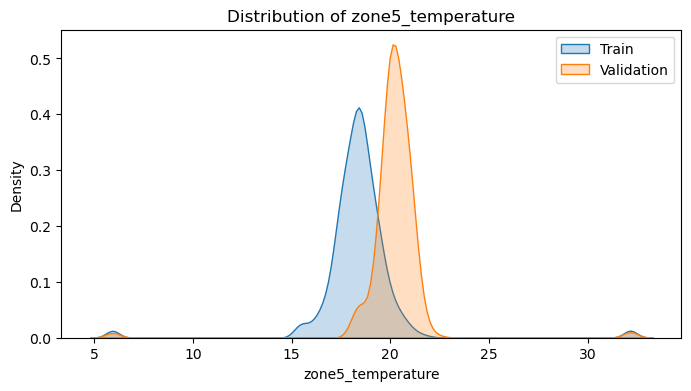

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


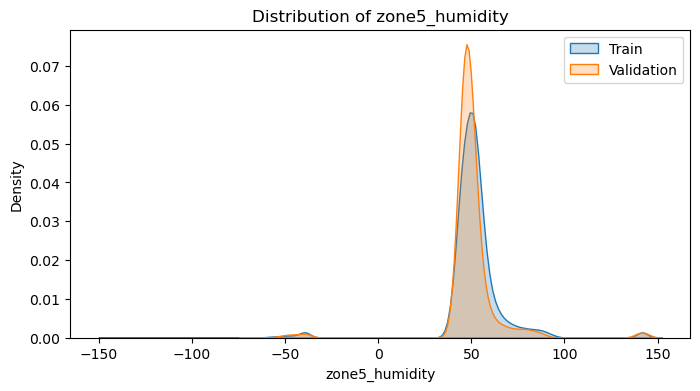

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


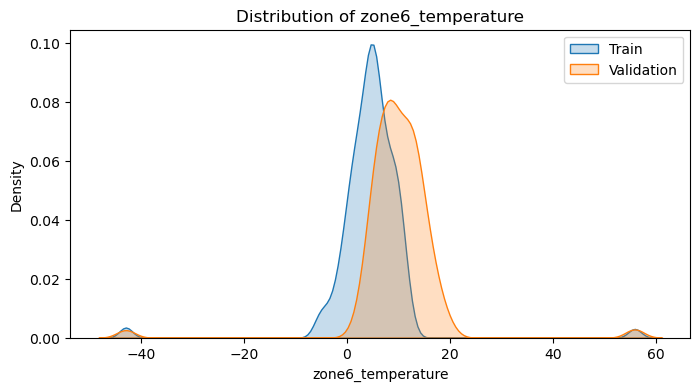

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


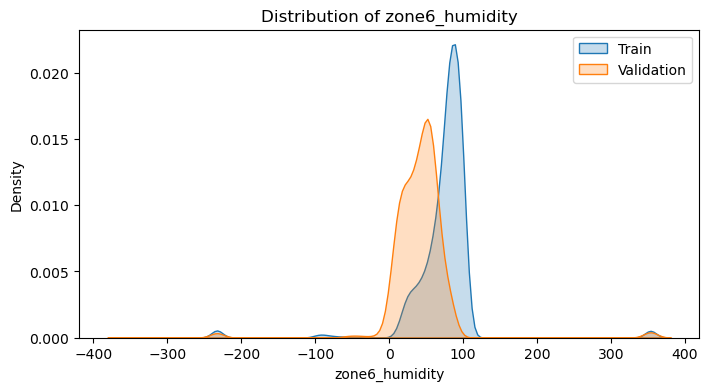

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


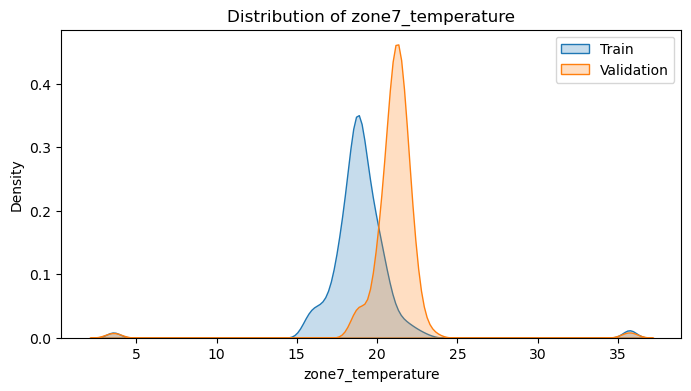

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


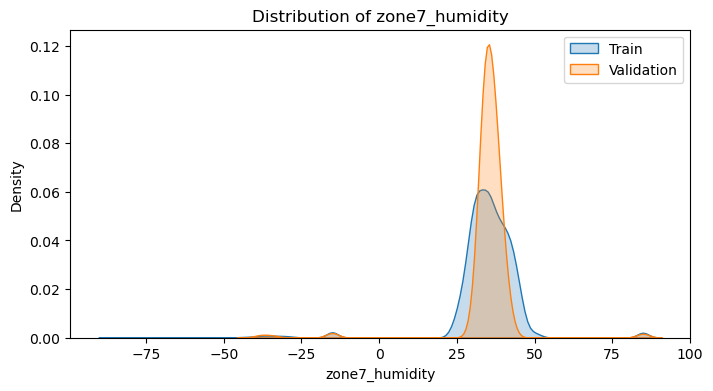

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


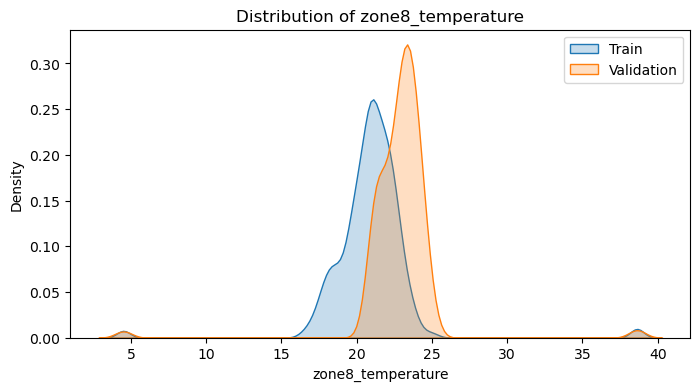

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


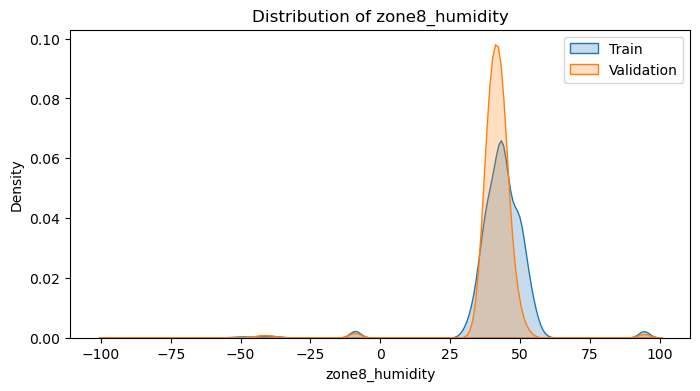

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


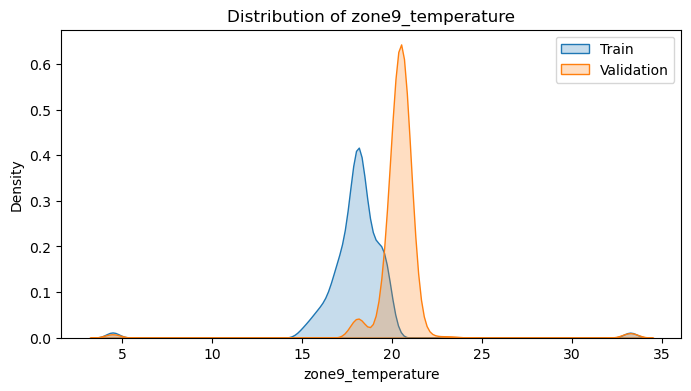

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


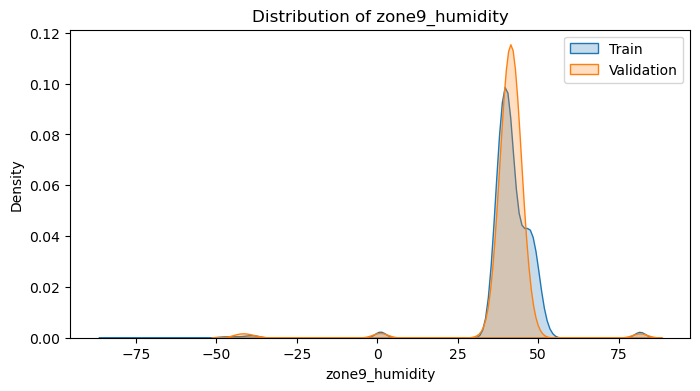

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


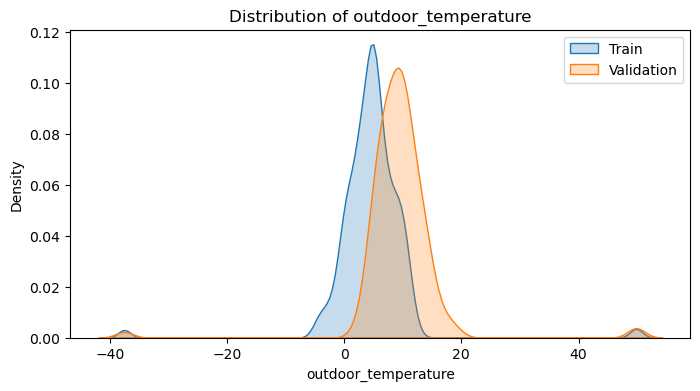

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


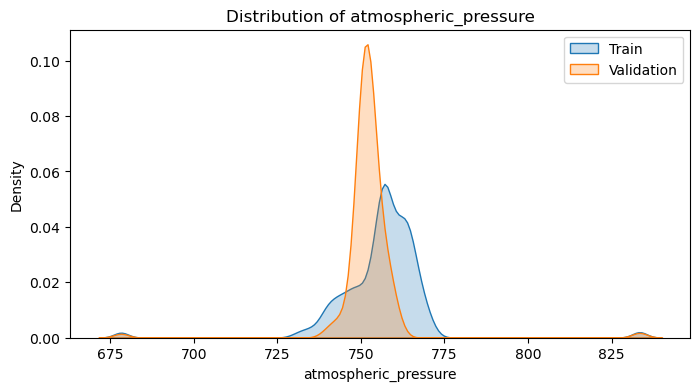

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


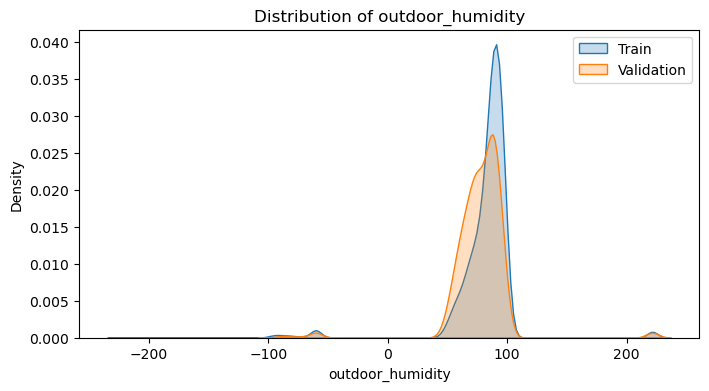

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


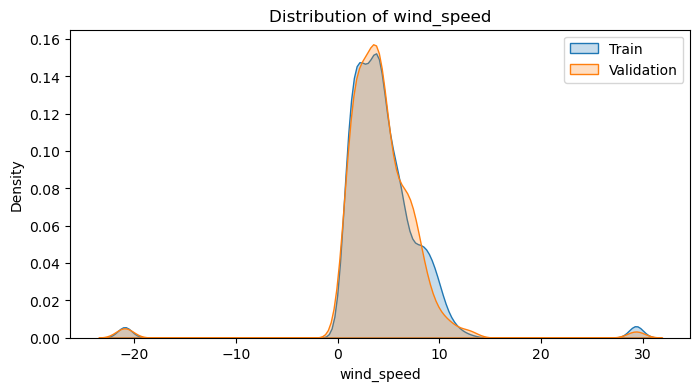

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


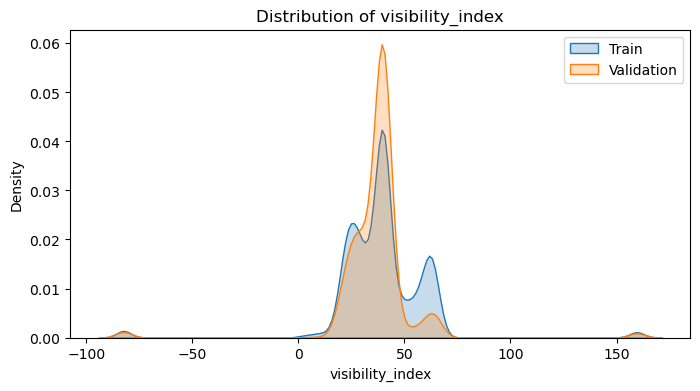

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


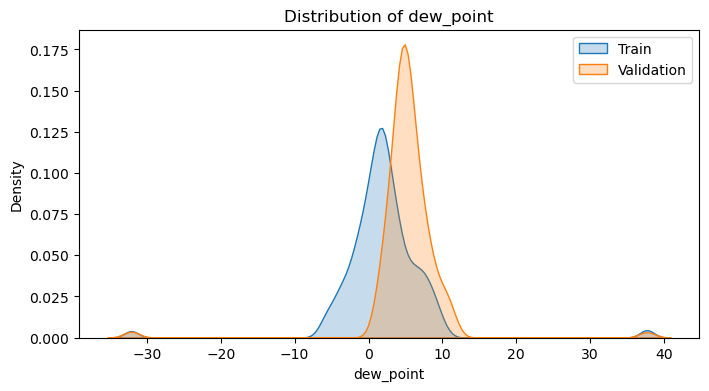

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


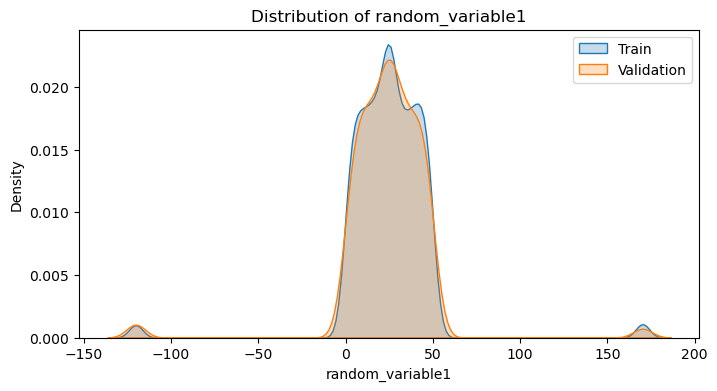

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


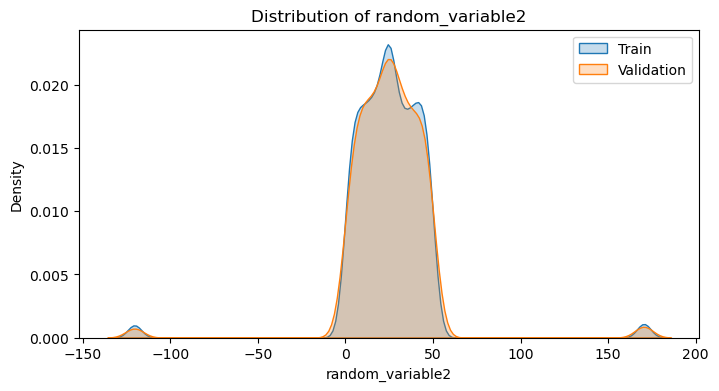

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18900\3650384580.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_train[col], label='Train', fill=True)
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\AppData\Local\Temp\ipykernel_18900\3650384580.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False

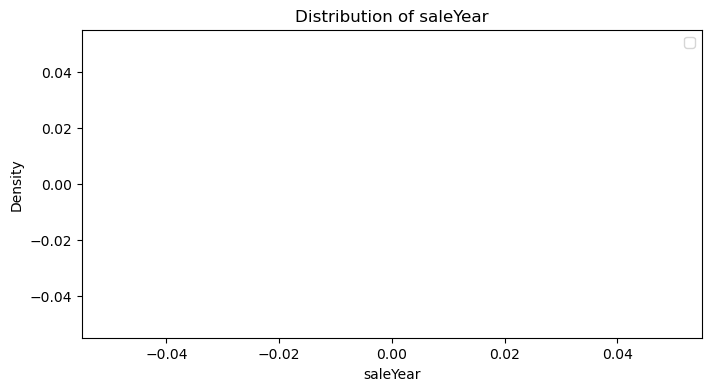

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


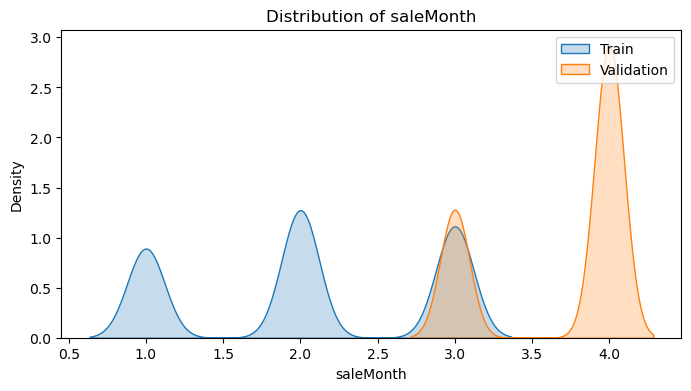

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


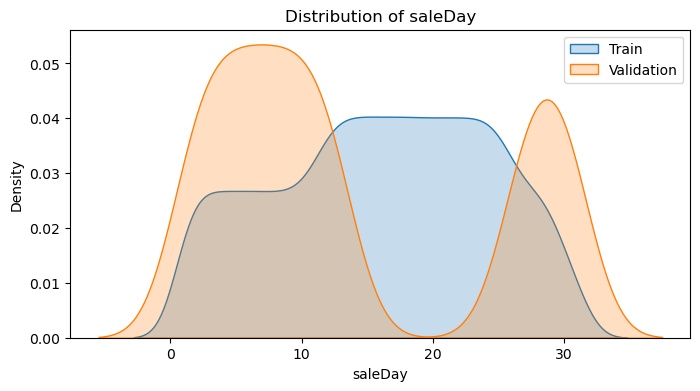

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


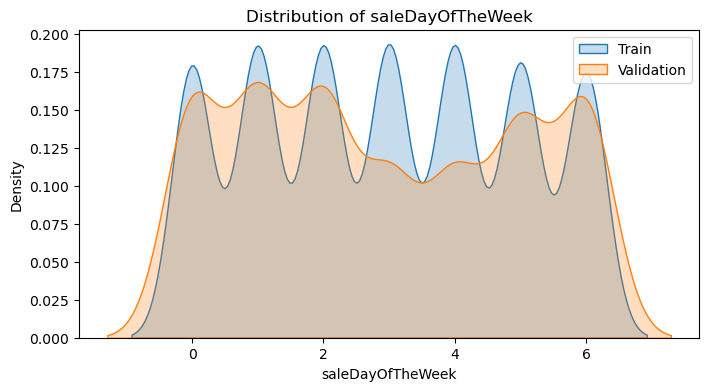

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


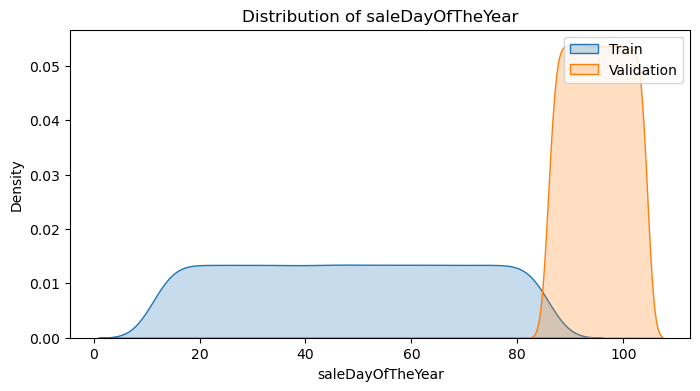

C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


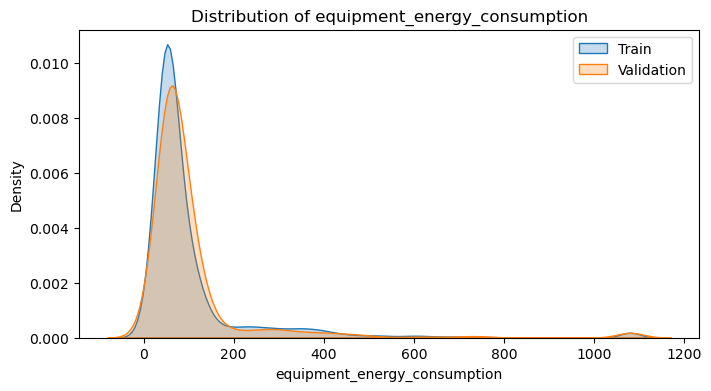

In [495]:
numeric_cols = data_train.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data_train[col], label='Train', fill=True)
    sns.kdeplot(val_data[col], label='Validation', fill=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


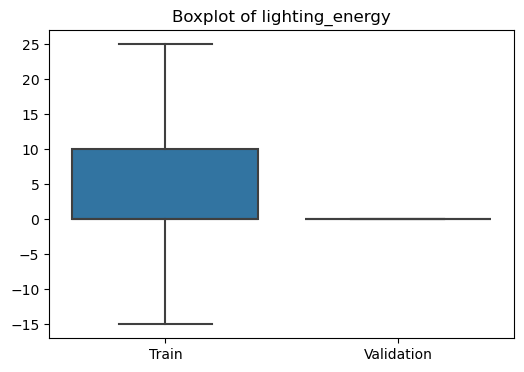

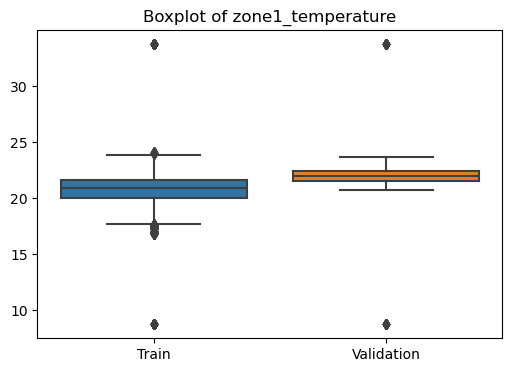

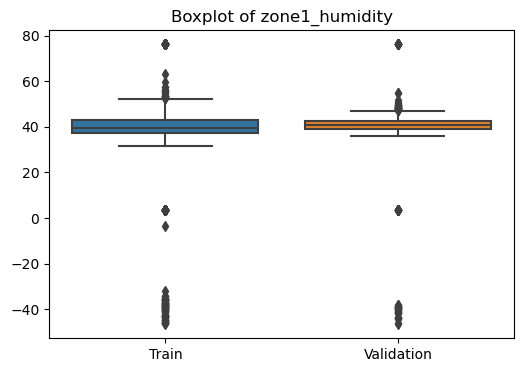

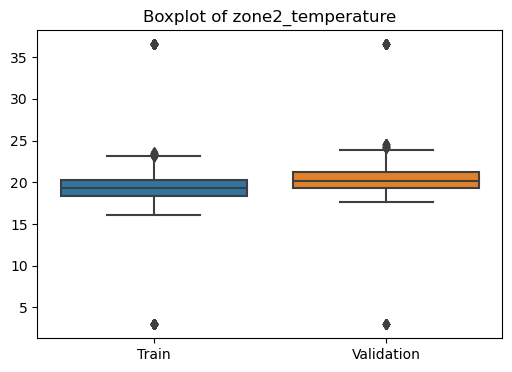

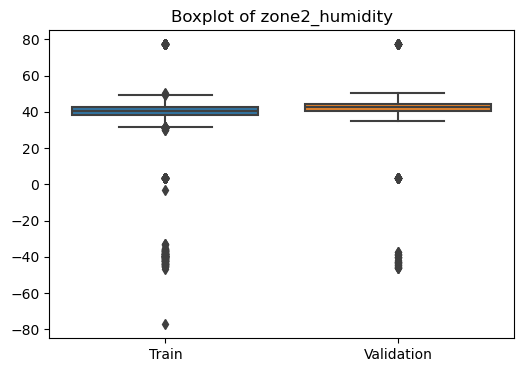

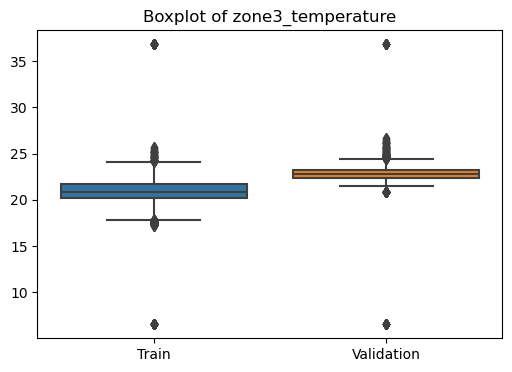

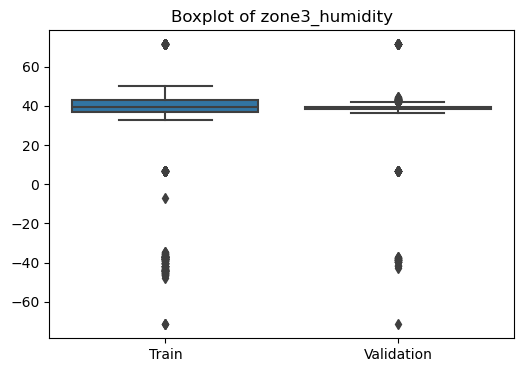

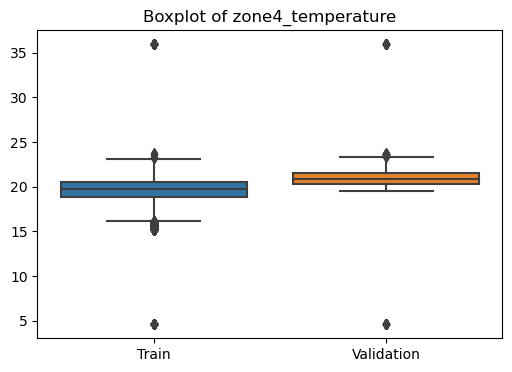

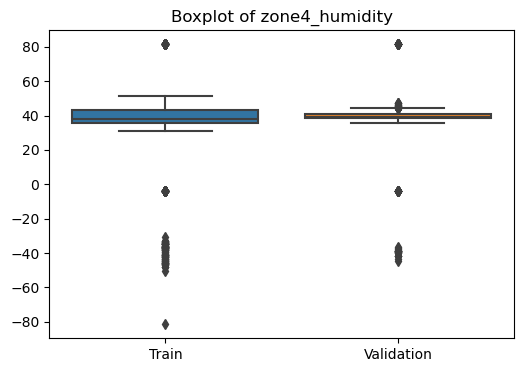

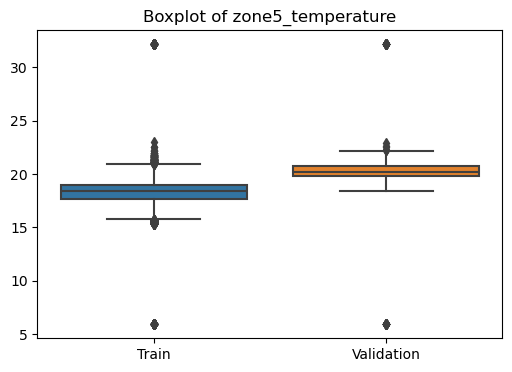

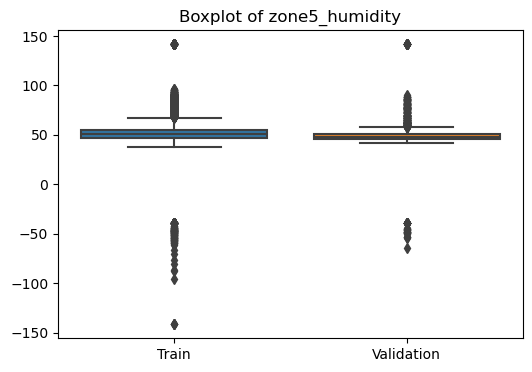

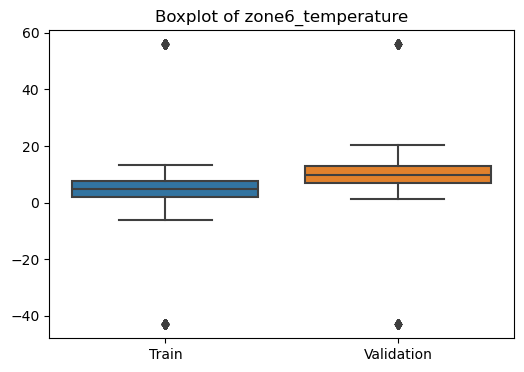

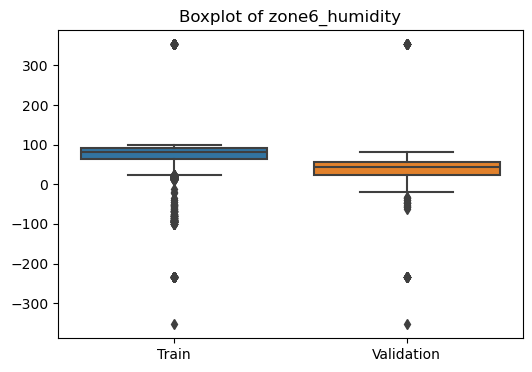

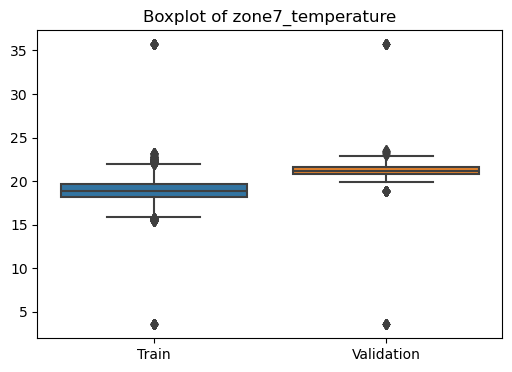

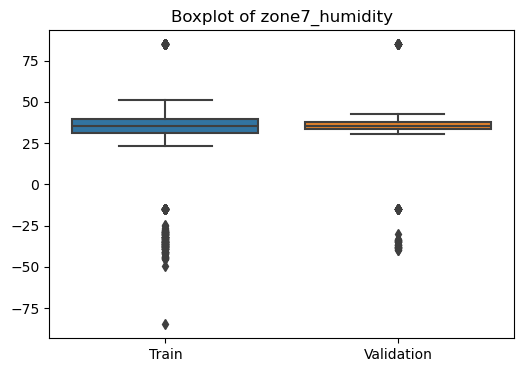

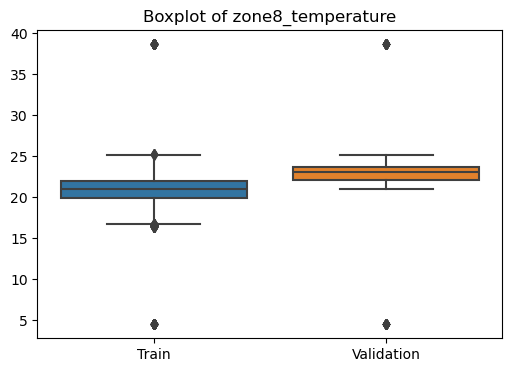

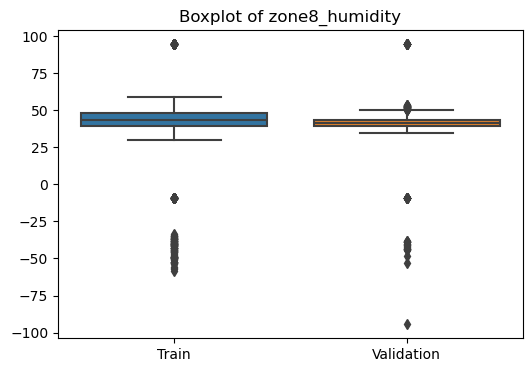

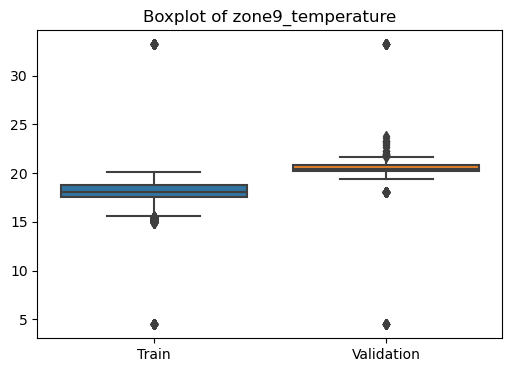

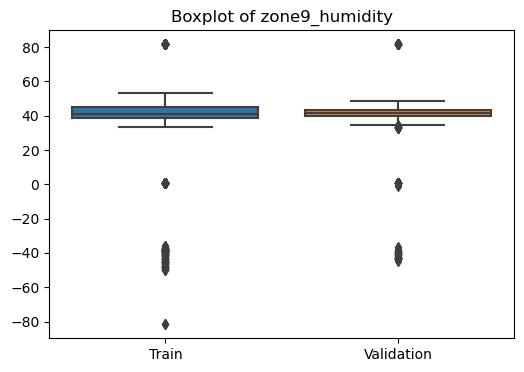

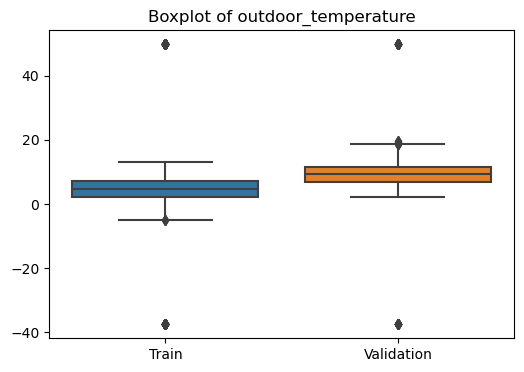

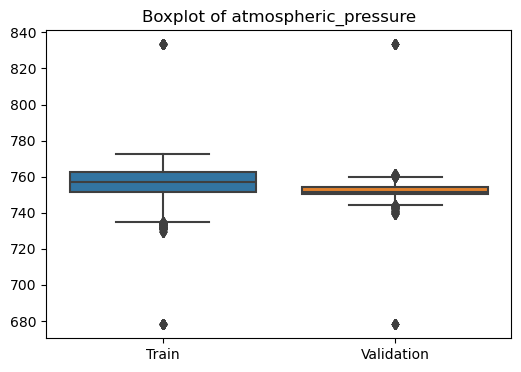

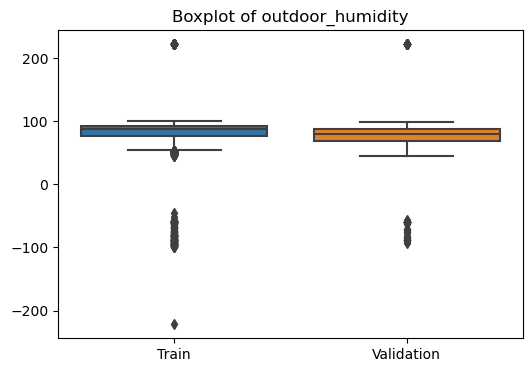

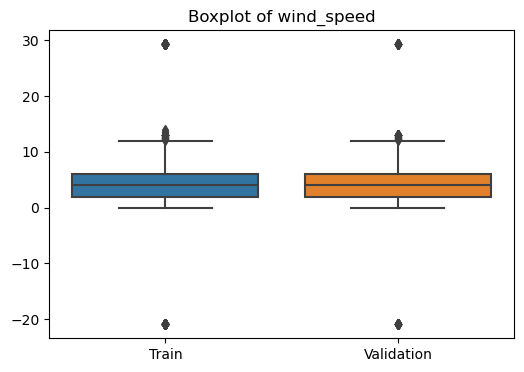

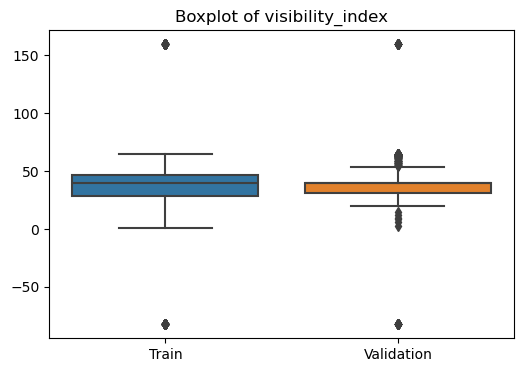

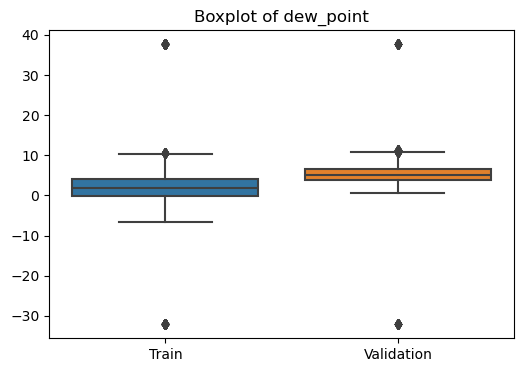

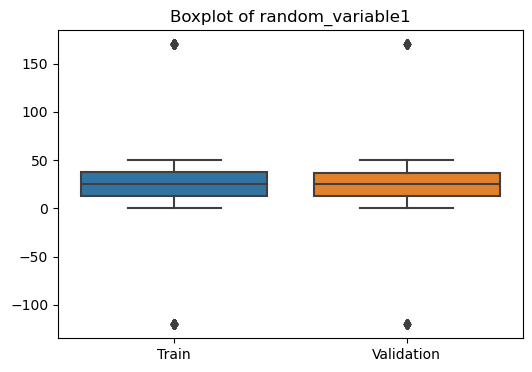

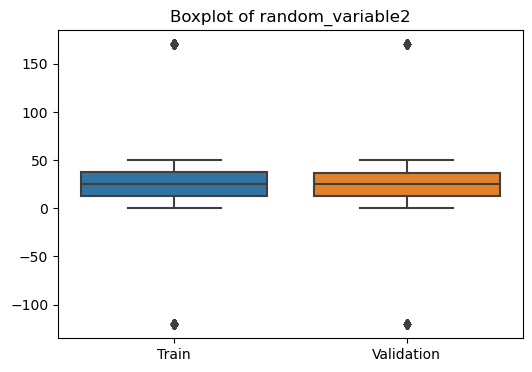

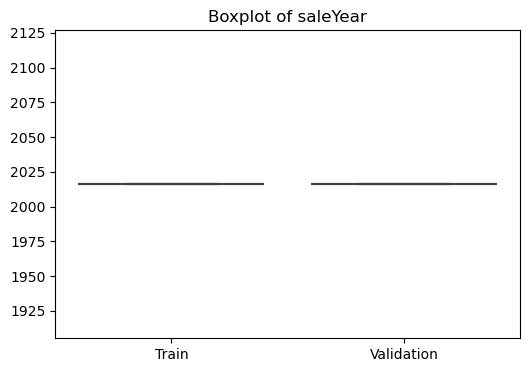

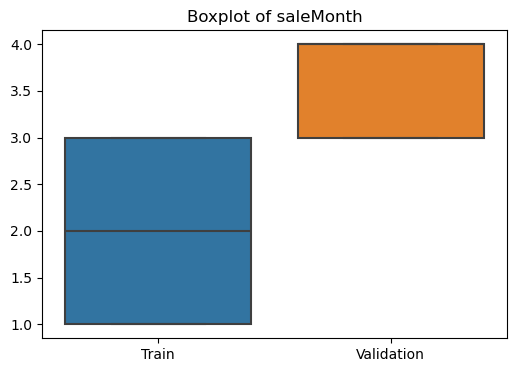

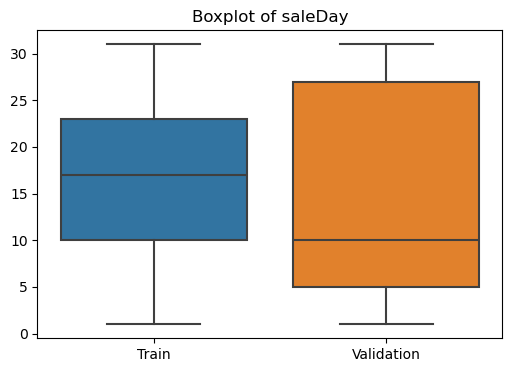

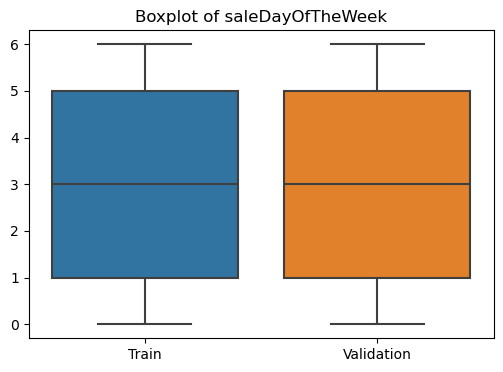

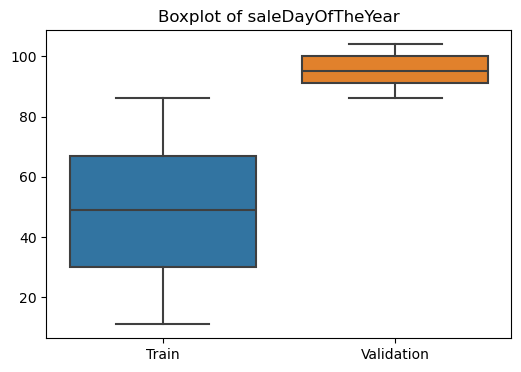

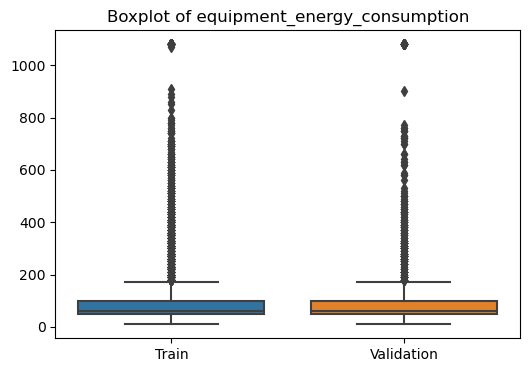

In [496]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=[data_train[col], val_data[col]])
    plt.xticks([0,1], ['Train', 'Validation'])
    plt.title(f'Boxplot of {col}')
    plt.show()


From the above plots, the columns 
- `lighting_energy`
- `saleYear`
- `saleMonth`
- `saleDayOfTheYear`

  Do not have similar scale. So remove those columns and then fit a model

In [497]:
model_3=RandomForestRegressor(n_jobs=-1,random_state=42)

In [498]:
cols_exclude=['lighting_energy','saleYear','saleMonth','saleDayOfTheYear']

In [499]:
model_3.fit(X_train.drop(cols_exclude,axis=1),y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [500]:
train_preds=model_3.predict(X_train.drop(cols_exclude,axis=1))
valid_preds=model_3.predict(X_valid.drop(cols_exclude,axis=1))
scores={
        'Train MAE':mean_absolute_error(y_train,train_preds),
        'Valid MAE':mean_absolute_error(y_valid,valid_preds),
        'Train RMSE':np.sqrt(mean_squared_error(y_train,train_preds)),
        'Valid RMSE':np.sqrt(mean_squared_error(y_valid,valid_preds)),
        'Train R2':r2_score(y_train,train_preds),
        'Valid R2':r2_score(y_valid,valid_preds)
}

In [501]:
scores

{'Train MAE': 23.20962180200223,
 'Valid MAE': 158.3002966258806,
 'Train RMSE': 48.711294133102406,
 'Valid RMSE': 189.7087013605193,
 'Train R2': 0.8829341564608197,
 'Valid R2': -0.6713841287787998}

<Axes: >

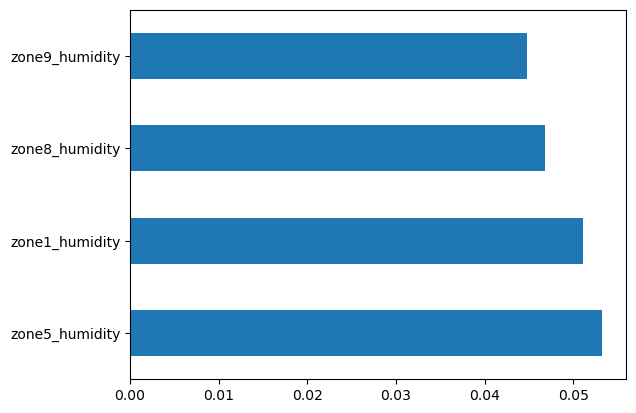

In [502]:
feat_importances = pd.Series(model_3.feature_importances_, index=X_train.columns.drop(cols_exclude
                                                                                     ))
feat_importances.nlargest(4).plot(kind='barh')

Even this didn't work.

In [503]:
model_1=RandomForestRegressor(n_estimators=500,n_jobs=-1)

In [504]:
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [505]:
show_scores(model_1)

{'Train MAE': 23.13091768631813,
 'Valid MAE': 161.94113459399333,
 'Train RMSE': 48.59085477132741,
 'Valid RMSE': 189.8944038965337,
 'Train R2': 0.8835123346976826,
 'Valid R2': -0.6746579078100841}

In [506]:
model_2=RandomForestRegressor(n_estimators=50,n_jobs=-1)

In [507]:
model_2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [508]:
show_scores(model_2
           )

{'Train MAE': 23.854282536151278,
 'Valid MAE': 162.26310715609935,
 'Train RMSE': 49.75339221679498,
 'Valid RMSE': 191.80106003249418,
 'Train R2': 0.877871715605658,
 'Valid R2': -0.70845591903601}

### Trying out Lasso regression

In [509]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

In [510]:
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [511]:
reg.predict(X_train)

array([ 66.96716782, 155.8810395 , 157.87655521, ...,  87.55363317,
       102.92655559,  86.00325338])

In [512]:
y_train

0        60.0
1        60.0
2        50.0
3        50.0
4        60.0
         ... 
10783    50.0
10784    60.0
10785    70.0
10786    80.0
10787    90.0
Name: equipment_energy_consumption, Length: 10788, dtype: float64

In [513]:
show_scores(reg)

{'Train MAE': 74.01956278378104,
 'Valid MAE': 64.23432881343169,
 'Train RMSE': 140.3296275188816,
 'Valid RMSE': 146.4217918332914,
 'Train R2': 0.028440040392493704,
 'Valid R2': 0.004335079876815695}

### Hyperparameter tuning with RandomizedSearchCV

In [514]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid={'n_estimators':np.arange(10,100,10),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2),
         'max_features':[0.5,1,'sqrt','auto'],
        }

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                                                  param_distributions=rf_grid,
                                                  n_iter=2,
                                                  cv=5,
                                                  verbose=True)
# fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Welcome\OneDrive\Desktop\DS intern assignment\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explic

CPU times: total: 22.7 s
Wall time: 35.8 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [515]:
show_scores(rs_model)

{'Train MAE': 51.43976299606369,
 'Valid MAE': 111.63477479184246,
 'Train RMSE': 113.34307563205905,
 'Valid RMSE': 156.59854233853375,
 'Train R2': 0.3661874273216682,
 'Valid R2': -0.1388779958007551}

Tried removing the `lighting_energy` column and train a model because it is highly correlated to target. But even that diidn't work

In [516]:
X_train_copy=X_train.copy()
X_valid_copy=X_valid.copy()

In [517]:
X_train.columns

Index(['lighting_energy', 'zone1_temperature', 'zone1_humidity',
       'zone2_temperature', 'zone2_humidity', 'zone3_temperature',
       'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
       'zone5_temperature', 'zone5_humidity', 'zone6_temperature',
       'zone6_humidity', 'zone7_temperature', 'zone7_humidity',
       'zone8_temperature', 'zone8_humidity', 'zone9_temperature',
       'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure',
       'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point',
       'random_variable1', 'random_variable2', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfTheWeek', 'saleDayOfTheYear'],
      dtype='object')

In [518]:
X_train_copy.drop('lighting_energy',axis=1,inplace=True)

In [519]:
X_valid_copy.drop('lighting_energy',axis=1,inplace=True)

The model below performed the best compared to the previous models. I got this result after I handled outliers in all columns in the dataset.

## Hyperparameter tuning using RandomForestRegressor

Even this didn't give good score

In [521]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid={'n_estimators':np.arange(10,100,10),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2),
         'max_features':[0.5,1,'sqrt','auto'],
        }

rs_model_2=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                                                  param_distributions=rf_grid,
                                                  n_iter=2,
                                                  cv=5,
                                                  verbose=True)
# fit the RandomizedSearchCV model
rs_model_2.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 500 ms
Wall time: 2.66 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [522]:
show_scores(rs_model_2)

{'Train MAE': 72.50109399034197,
 'Valid MAE': 79.58044343455822,
 'Train RMSE': 138.97415282423415,
 'Valid RMSE': 144.75729935110232,
 'Train R2': 0.04711841543174722,
 'Valid R2': 0.02684343692963509}

In [523]:
model_2.feature_importances_

array([0.02900394, 0.02593871, 0.0480392 , 0.03687933, 0.03767208,
       0.03652865, 0.03716738, 0.03212728, 0.02998534, 0.02964569,
       0.05130252, 0.03449775, 0.03876579, 0.02639699, 0.03444372,
       0.03947966, 0.05065028, 0.02328973, 0.03429673, 0.03930836,
       0.03432406, 0.0377239 , 0.03098263, 0.03689353, 0.02711192,
       0.03458645, 0.02690611, 0.        , 0.00353779, 0.01713377,
       0.01365844, 0.02172227])

<Axes: >

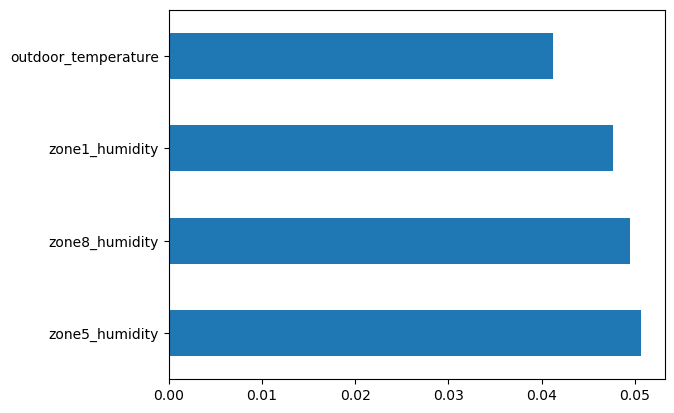

In [524]:
feat_importances = pd.Series(model_0.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

## Trying simpler models

In [525]:
# import models for initial experimentation
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,AdaBoostRegressor, GradientBoostingRegressor
     

In [526]:
# create a dictionary of models
np.random.seed(42)
models={'Linear Reg':LinearRegression(),
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'RandomForest':RandomForestRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor()
        }


In [528]:
# checking out the score of each model
for model_name,model in models.items():
    print(model_name)
    model.fit(X_train,y_train)
    print(show_scores(model))
    print('----------')

Linear Reg
{'Train MAE': 74.02998944644708, 'Valid MAE': 63.33107955850318, 'Train RMSE': 140.31168981840133, 'Valid RMSE': 146.53057114809542, 'Train R2': 0.028688404733220763, 'Valid R2': 0.0028551365119569017}
----------
Ridge
{'Train MAE': 74.02159602802921, 'Valid MAE': 63.577258985351826, 'Train RMSE': 140.31313991880904, 'Valid RMSE': 146.49220598850331, 'Train R2': 0.028668327908254354, 'Valid R2': 0.0033772202438689947}
----------
Lasso
{'Train MAE': 74.04515118118064, 'Valid MAE': 64.35429494112869, 'Train RMSE': 140.33584423121022, 'Valid RMSE': 146.4813933792825, 'Train R2': 0.028353956752538267, 'Valid R2': 0.003524336534362793}
----------
DecisionTreeRegressor
{'Train MAE': 0.0, 'Valid MAE': 177.26362625139043, 'Train RMSE': 0.0, 'Valid RMSE': 318.0750640727312, 'Train R2': 1.0, 'Valid R2': -3.6985193342436578}
----------
RandomForest
{'Train MAE': 23.594929551353356, 'Valid MAE': 165.1304412309974, 'Train RMSE': 49.359812866859514, 'Valid RMSE': 193.79051791819396, 'Trai